# **Predicting Movie Ratings: A Regression-Based Approach Using the MovieLens Dataset**

Collaborators : Kishore Buddi, Pradeep Yellapu



## **Introduction**

The world of online streaming platforms and content delivery services has revolutionized the way people consume movies. Personalization has become a crucial part of user experience, with recommendation engines driving engagement, retention, and satisfaction. One of the most widely used datasets for building and understanding recommendation engines is the MovieLens dataset.

The motivation behind this project is to leverage the richness of the MovieLens dataset to predict movie ratings and explore the underlying factors that influence user preferences. By predicting the rating, we can provide valuable insights into user behavior, help platforms recommend personalized content, and contribute to the broader field of recommender systems.

This project aims to apply regression-based machine learning models to predict the target variable — movie ratings — based on movie metadata and user interactions. Unlike classification problems that aim to categorize items, regression offers a nuanced prediction of the actual rating score. By understanding the factors that impact the user's rating of a movie, streaming platforms and entertainment services can make more accurate, data-driven content recommendations.

Additionally, this project provides an opportunity to practice critical data science skills, such as data cleaning, transformation, feature engineering, and model evaluation. It allows us to explore essential machine learning techniques and evaluate the effectiveness of different regression models. By comparing the prediction accuracies of various models, we aim to determine which model best captures the underlying patterns in the data.

## **About the Dataset**

The MovieLens dataset is a well-structured and widely used dataset for recommendation system research. For this project, we have selected three key files:

*  ratings.csv: Contains user ratings for different movies, along with the corresponding user IDs, movie IDs, and timestamps of the ratings.
*  movies.csv: Provides details about the movies, including the movie title and the genres associated with each film.
*  tags.csv: Contains user-provided tags for certain movies, which can offer contextual information for understanding movie content or themes.
The primary target variable for this project is the rating, which represents how a user rates a specific movie on a numerical scale. This variable will be predicted using various regression models.

To prepare for model development, several essential preprocessing steps have been undertaken:

* Data Cleaning: Duplicate rows were removed, and missing values were identified and handled to ensure clean and consistent datasets.
* Data Transformation:
The timestamp column in the ratings file was converted into a human-readable date format to extract time-based insights.
The release year of movies was extracted from the movie title, adding a new feature that could impact users' rating preferences.
* Data Reduction:
The datasets were reduced to more manageable sizes, with 100,000 randomly selected movies and 1,000,000 rows for the ratings and tags datasets.
This reduction helps improve computational efficiency, enabling faster model training and analysis.
* Data Merging:
The ratings and movies datasets were merged on the movieId column, ensuring only movies that appear in both datasets were included for analysis.
With a clean and well-structured dataset, the next step is to construct various regression models that predict the user’s rating for a movie. Models such as Linear Regression, Decision Trees, Random Forest, and XGBoost will be implemented. Each model will be evaluated on accuracy, mean absolute error (MAE), and root mean square error (RMSE) to compare their performance. The ultimate goal is to identify which regression model can most accurately predict the movie ratings, offering insights into user preferences and aiding in the development of personalized recommendation engines.

Pandas Documentation: https://pandas.pydata.org/docs/
Useful for understanding data manipulation steps, e.g., handling missing values, feature extraction, or merging datasets.

Scikit-Learn Documentation: https://scikit-learn.org/stable/
Covers regression and classification models like KNN, Logistic Regression, Random Forest, and pipelines.

Matplotlib Documentation: https://matplotlib.org/stable/contents.html
For creating visualizations like the comparison bar plots.

In [ ]:
import os
import pandas as pd

# File paths
ratings_path = "/content/ratings.csv"
movies_path = "/content/movies.csv"
tags_path = "/content/tags.csv"

# Function to load datasets
def load_dataset(file_path):
    """Load a dataset and validate its existence."""
    if os.path.exists(file_path):
        print(f"Loading dataset from {file_path}...")
        return pd.read_csv(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

# Load datasets
ratings = load_dataset(ratings_path)
movies = load_dataset(movies_path)
tags = load_dataset(tags_path)

# Display loaded data
if ratings is not None:
    print("\nRatings Dataset Loaded:")
    print(ratings.head())

if movies is not None:
    print("\nMovies Dataset Loaded:")
    print(movies.head())

if tags is not None:
    print("\nTags Dataset Loaded:")
    print(tags.head())

Loading dataset from /content/ratings.csv...
Loading dataset from /content/movies.csv...
Loading dataset from /content/tags.csv...

Ratings Dataset Loaded:
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858

Movies Dataset Loaded:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

* Loads and validates the datasets ratings.csv, movies.csv, and tags.csv.
* Checks if each file exists before loading to avoid file-not-found errors.
* Uses pd.read_csv() to load the datasets and displays the first few rows for a quick preview.
* Ensures the datasets are ready for further analysis and processing.

BASIC DATA CLEANING

We will first focus on data cleaning and preprocessing to ensure the integrity and consistency of our datasets. This step is crucial as it lays the foundation for accurate analysis and reliable model performance. We will begin by removing duplicate rows from the ratings, movies, and tags datasets, thereby eliminating any redundant information that could skew our results. Next, we will identify and handle missing values in each dataset, displaying the count of null values for each column.

This is to improve data quality but also reduce the risk of complications during model training and evaluation.

In [ ]:
# Step 2: Data Cleaning
if ratings is not None:
    # Drop duplicates
    ratings.drop_duplicates(inplace=True)
    print("\nDropped duplicates from Ratings Dataset.")

    # Check for missing values
    print("\nMissing Values in Ratings Dataset:")
    print(ratings.isnull().sum())

if movies is not None:
    # Drop duplicates
    movies.drop_duplicates(inplace=True)
    print("\nDropped duplicates from Movies Dataset.")

    # Check for missing values
    print("\nMissing Values in Movies Dataset:")
    print(movies.isnull().sum())

if tags is not None:
    # Drop duplicates
    tags.drop_duplicates(inplace=True)
    print("\nDropped duplicates from Tags Dataset.")

    # Check for missing values
    print("\nMissing Values in Tags Dataset:")
    print(tags.isnull().sum())


Dropped duplicates from Ratings Dataset.

Missing Values in Ratings Dataset:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Dropped duplicates from Movies Dataset.

Missing Values in Movies Dataset:
movieId    0
title      0
genres     0
dtype: int64

Dropped duplicates from Tags Dataset.

Missing Values in Tags Dataset:
userId        0
movieId       0
tag          17
timestamp     0
dtype: int64


DATA TRANSFORMATION

In [ ]:
from datetime import datetime

# Transform datasets
if ratings is not None:
    # Convert timestamp to readable format
    ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
    print("\nTransformed Ratings Dataset (Timestamp Converted):")
    print(ratings.head())

if movies is not None:
    # Extract release year from movie titles
    movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
    movies['year'] = pd.to_numeric(movies['year'], errors='coerce')
    print("\nTransformed Movies Dataset (Year Extracted):")
    print(movies.head())


Transformed Ratings Dataset (Timestamp Converted):
   userId  movieId  rating           timestamp
0       1       17     4.0 1999-12-03 19:24:37
1       1       25     1.0 1999-12-03 19:43:48
2       1       29     2.0 1999-11-22 00:36:16
3       1       30     5.0 1999-12-03 19:24:37
4       1       32     5.0 1999-11-22 00:00:58

Transformed Movies Dataset (Year Extracted):
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres    year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995.0  
1                   Adventure|Children|Fantasy  1995.0  
2                               Comedy|Romance  1995.0  
3                         Comedy|Drama|Romance  1995.0  
4                                 

* Converts the timestamp column in the ratings dataset to a human-readable datetime format.
* Extracts the release year from the title column in the movies dataset using regex.
* Converts the extracted year to a numeric format, handling any non-numeric values gracefully.
* Enhances the datasets by making time-related information more interpretable and usable for analysis.

REDUCE THE DATASET

Before proceeding with the next phase of our project, we will focus on data reduction and merging to create a more efficient and manageable dataset for analysis. Given the large size of the MovieLens dataset, reducing the volume of data will help us avoid computational bottlenecks while maintaining the diversity and representativeness of the data.

We will begin by reducing the size of the movies dataset, randomly selecting a subset of movies using a fixed sample size. This process ensures that our dataset remains diverse while being small enough to handle efficiently. The reduced dataset will be saved as reduced_movies.csv for future reference and reuse.

Next, we will randomize and sample the ratings and tags datasets, shuffling and extracting a subset of rows to ensure uniform representation of the data. This step prevents overfitting and maintains the randomness of the samples while improving processing speed.

Finally, we will merge the reduced ratings and movies datasets using the movieId column as the key. This inner join ensures that only movies present in both datasets are retained for analysis. The resulting merged dataset will serve as the primary dataset for model training and evaluation. This process allows us to focus on relevant records, reducing redundancy while improving computational efficiency and scalability.








In [ ]:
# Reduce the movies dataset
REDUCE_SIZE = 100000  # Number of movies to fetch metadata for (adjustable)

if movies is not None:
    reduced_movies = movies.sample(n=min(REDUCE_SIZE, len(movies)), random_state=42).reset_index(drop=True)
    print("\nReduced Movies Dataset Shape:", reduced_movies.shape)
    print(reduced_movies.head())

    # Save the reduced dataset for reference
    reduced_movies.to_csv("/content/reduced_movies.csv", index=False)
    print("\nReduced Movies Dataset saved to '/content/reduced_movies.csv'.")


Reduced Movies Dataset Shape: (87585, 4)
   movieId                           title                 genres    year
0   120510          Value for Money (1955)         Comedy|Romance  1955.0
1   212955             Face of Evil (1996)         Drama|Thriller  1996.0
2   193912              Spring 1941 (2007)      Drama|Romance|War  2007.0
3   163921               Wolf Creek (2016)  Crime|Horror|Thriller  2016.0
4   126652  Raven the Little Rascal (2012)     Animation|Children  2012.0

Reduced Movies Dataset saved to '/content/reduced_movies.csv'.


RANDOMIZE AND SAMPLING

In [ ]:
def randomize_and_sample(dataset, sample_size, name):
    """Randomize and sample the dataset."""
    if dataset.empty:
        print(f"{name} dataset is empty. Skipping randomization and sampling.")
        return dataset

    print(f"\nRandomizing and reducing {name} dataset...")
    randomized = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
    reduced = randomized.head(sample_size)
    print(f"Reduced {name} dataset to {len(reduced)} rows.")
    return reduced

REDUCE_SIZE = 1000000  # Adjust as needed
ratings = randomize_and_sample(ratings, REDUCE_SIZE, "Ratings")
tags = randomize_and_sample(tags, REDUCE_SIZE, "Tags")


Randomizing and reducing Ratings dataset...
Reduced Ratings dataset to 1000000 rows.

Randomizing and reducing Tags dataset...
Reduced Tags dataset to 1000000 rows.


* Randomizes and reduces the size of the ratings and tags datasets to a maximum of 1,000,000 rows each.
* Shuffles the rows randomly using a fixed random seed (42) to ensure reproducibility.
* Resets the index of the reduced datasets for better row alignment.
* Speeds up processing by working with a smaller, randomized subset of the full datasets.

MERGING DATASET

In [ ]:
def merge_datasets(ratings, movies):
    """Merge ratings and movies datasets on 'movieId'."""
    if ratings.empty or movies.empty:
        print("Ratings or Movies dataset is empty. Skipping merge.")
        return pd.DataFrame()

    print("\nMerging Ratings and Movies datasets...")
    merged_data = pd.merge(ratings, movies, on="movieId", how="inner")
    print(f"Merged dataset shape: {merged_data.shape}")
    return merged_data

movie_ratings_reduced = merge_datasets(ratings, movies)

# Print the first few rows of the merged dataset
print("\nMerged Dataset (Ratings and Movies):")
print(movie_ratings_reduced.head())



Merging Ratings and Movies datasets...
Merged dataset shape: (1000000, 7)

Merged Dataset (Ratings and Movies):
   userId  movieId  rating           timestamp  \
0   66954      781     5.0 1996-12-18 21:29:37   
1    9877      574     4.0 1999-12-18 05:40:14   
2   38348     1088     2.0 2001-09-08 18:47:47   
3  101952     2706     1.0 2008-02-15 12:12:45   
4  140400   275079     3.5 2022-05-29 00:01:03   

                                 title  \
0               Stealing Beauty (1996)   
1           Spanking the Monkey (1994)   
2                 Dirty Dancing (1987)   
3                  American Pie (1999)   
4  Chip 'n Dale: Rescue Rangers (2022)   

                                              genres    year  
0                                              Drama  1996.0  
1                                       Comedy|Drama  1994.0  
2                              Drama|Musical|Romance  1987.0  
3                                     Comedy|Romance  1999.0  
4  Adventure|Anima

* Merges the ratings and movies datasets on the movieId column using an inner join.
* Ensures only movies present in both datasets are included in the merged result.
* Prints the shape of the merged dataset to verify the number of rows and columns.
* Prepares a unified dataset (movie_ratings_reduced) that combines movie metadata with user rating information for further analysis.



---



FETCH META DATA

We will now fetch, transform, and save our datasets to prepare them for analysis.

* First, we'll fetch metadata from the OMDb API, enriching our movies with details like genre, director, actors, and IMDb ratings. These features will serve as valuable inputs for our regression models.

* Next, we'll transform the datasets by converting timestamps in the ratings dataset to readable dates and extracting release years from movie titles. These transformations enhance the dataset's interpretability and analytical potential.

* Finally, we'll save the cleaned and enriched datasets as CSV files, ensuring they're ready for future use. This step establishes a well-structured, feature-rich dataset for training and testing regression models.

In [ ]:
import requests

def fetch_movie_metadata(title, year=None, movie_type="movie"):
    """Fetch movie metadata from OMDb API."""
    api_key = "c3c4d1cd"  # Replace with your valid OMDb API key
    url = f"http://www.omdbapi.com/?t={title}&type={movie_type}&apikey={api_key}"
    if year:
        url += f"&y={year}"

    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()

        if data.get("Response") == "True" and data.get("Title", "").lower() == title.lower():
            metadata = {
                "Title": data.get("Title"),
                "Year": data.get("Year"),
                "Genre": data.get("Genre"),
                "Director": data.get("Director"),
                "Actors": data.get("Actors"),
                "Plot": data.get("Plot"),
                "IMDb Rating": data.get("imdbRating"),
                "Box Office": data.get("BoxOffice")
            }
            return metadata
        else:
            return {"Error": f"Title mismatch or movie not found: {data.get('Error', 'N/A')}"}
    except requests.exceptions.RequestException as e:
        return {"Error": f"Request error: {str(e)}"}

# Example usage
movie_metadata = fetch_movie_metadata("Inception", year=2010)
print("\nMovie Metadata for 'Inception':", movie_metadata)


Movie Metadata for 'Inception': {'Title': 'Inception', 'Year': '2010', 'Genre': 'Action, Adventure, Sci-Fi', 'Director': 'Christopher Nolan', 'Actors': 'Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page', 'Plot': 'A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O., but his tragic past may doom the project and his team to disaster.', 'IMDb Rating': '8.8', 'Box Office': '$292,587,330'}


TRANSFORM DATA

In [ ]:
def transform_datasets(ratings, movies):
    """Transform datasets: Convert timestamps and extract release years."""
    if not ratings.empty:
        ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
        print("Converted timestamps in Ratings dataset.")

    if not movies.empty:
        movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
        movies['year'] = pd.to_numeric(movies['year'], errors='coerce')
        print("Extracted release years from movie titles in Movies dataset.")

    return ratings, movies

ratings, movies = transform_datasets(ratings, movies)

# Print the first few rows of the transformed ratings dataset
print("\nTransformed Ratings Dataset:")
print(ratings.head())

# Print the first few rows of the transformed movies dataset
print("\nTransformed Movies Dataset:")
print(movies.head())

Converted timestamps in Ratings dataset.
Extracted release years from movie titles in Movies dataset.

Transformed Ratings Dataset:
   userId  movieId  rating           timestamp
0   66954      781     5.0 1996-12-18 21:29:37
1    9877      574     4.0 1999-12-18 05:40:14
2   38348     1088     2.0 2001-09-08 18:47:47
3  101952     2706     1.0 2008-02-15 12:12:45
4  140400   275079     3.5 2022-05-29 00:01:03

Transformed Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres    year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995.0  
1                   Adventure|Children|Fantasy  1995.0  
2                               Comedy|Romance  1995.0  
3                         Co

SAVING DATASET

In [ ]:
def save_dataset(dataset, file_name):
    """Save the final dataset to a CSV file."""
    if dataset.empty:
        print(f"Dataset is empty. Skipping save for {file_name}.")
        return

    output_path = f"/content/{file_name}"
    dataset.to_csv(output_path, index=False)
    print(f"Saved dataset to {output_path}")

save_dataset(movie_ratings_reduced, "final_movie_ratings_reduced.csv")

Saved dataset to /content/final_movie_ratings_reduced.csv


* Saves the movie_ratings_reduced dataset as a CSV file named final_movie_ratings_reduced.csv.
* Checks if the dataset is empty before saving to avoid creating an empty file.
* Saves the file to the /content/ directory with no index column for cleaner output.
* Provides a confirmation message with the file path once the dataset is successfully saved.



---


DATA PRE PROCESSING


DATA CLEANING

To prepare our dataset for analysis, we will clean, transform, and encode the data to enhance its structure and usability.

* First, we'll clean and transform the data by handling missing values and duplicates, converting timestamps to readable dates, and extracting the release year from movie titles. These steps ensure a clean, consistent, and feature-rich dataset.

* Next, we'll create a sparse user-movie interaction matrix. By mapping userId and movieId to consecutive integers, we construct a CSR sparse matrix to efficiently represent user-movie interactions. This matrix allows for scalable computations and provides insights into dataset sparsity, which is crucial for recommendation system design.

In [ ]:
from datetime import datetime
import pandas as pd

def clean_and_transform_data(data):
    """
    Clean and transform the dataset:
    - Drop missing values
    - Drop duplicates
    - Convert timestamp to human-readable format
    - Extract release year from movie titles
    """
    print("\nCleaning and transforming dataset...")

    # Drop rows with missing values
    data_cleaned = data.dropna()
    print(f"Dropped missing values. Remaining rows: {data_cleaned.shape[0]}")

    # Drop duplicate rows
    data_cleaned = data_cleaned.drop_duplicates()
    print(f"Dropped duplicate rows. Remaining rows: {data_cleaned.shape[0]}")

    # Convert timestamp to datetime
    data_cleaned['timestamp'] = pd.to_datetime(data_cleaned['timestamp'], unit='s')
    print("Converted timestamps to datetime.")

    # Extract release year from movie titles
    data_cleaned['year'] = data_cleaned['title'].str.extract(r'\((\d{4})\)')
    data_cleaned['year'] = pd.to_numeric(data_cleaned['year'], errors='coerce')
    print("Extracted release year from movie titles.")

    return data_cleaned

# Clean the dataset
movie_ratings_cleaned = clean_and_transform_data(movie_ratings_reduced)


Cleaning and transforming dataset...
Dropped missing values. Remaining rows: 998983
Dropped duplicate rows. Remaining rows: 998983
Converted timestamps to datetime.
Extracted release year from movie titles.


* Cleans and transforms the movie_ratings_reduced dataset to prepare it for analysis.
* Drops missing values and removes duplicate rows to ensure data integrity and reduce redundancy.
* Converts the timestamp column to a human-readable datetime format for better interpretability.
* Extracts the release year from the movie title using a regex pattern and converts it to a numeric format.
* Returns a clean, structured dataset (movie_ratings_cleaned) ready for analysis and modeling.

SPARSE MATRIX

In [ ]:
from scipy.sparse import csr_matrix

def create_sparse_matrix(data):
    """
    Create a sparse user-movie interaction matrix:
    - Map userId and movieId to consecutive integers
    - Create a CSR sparse matrix
    - Calculate sparsity
    """
    print("\nCreating sparse user-movie interaction matrix...")

    # Map userId and movieId to consecutive integers
    user_id_map = {user_id: idx for idx, user_id in enumerate(data['userId'].unique())}
    movie_id_map = {movie_id: idx for idx, movie_id in enumerate(data['movieId'].unique())}

    data['userId_mapped'] = data['userId'].map(user_id_map)
    data['movieId_mapped'] = data['movieId'].map(movie_id_map)

    # Create sparse matrix
    sparse_matrix = csr_matrix(
        (data['rating'], (data['userId_mapped'], data['movieId_mapped'])),
        shape=(len(user_id_map), len(movie_id_map))
    )

    # Calculate sparsity
    sparsity = 1 - (sparse_matrix.nnz / (sparse_matrix.shape[0] * sparse_matrix.shape[1]))
    print(f"Sparse Matrix Shape: {sparse_matrix.shape}")
    print(f"Sparsity: {sparsity:.2%}")

    return sparse_matrix, data

# Create sparse matrix
sparse_user_movie_matrix, movie_ratings_cleaned = create_sparse_matrix(movie_ratings_cleaned)


Creating sparse user-movie interaction matrix...
Sparse Matrix Shape: (167241, 27625)
Sparsity: 99.98%


* Creates a sparse user-movie interaction matrix to represent user ratings for movies.
* Maps userId and movieId to unique consecutive integers to create an efficient matrix structure.
* Builds a CSR (Compressed Sparse Row) matrix where rows correspond to users, columns correspond to movies, and values represent movie ratings.
* Calculates sparsity to measure how much of the matrix is filled with non-zero values, highlighting the sparsity typical in recommendation systems.
* Returns the sparse matrix and the updated dataset with mapped user and movie IDs for efficient processing.

ONE-HOT ENCODING FOR GENRES

We'll one-hot encode the 'genres' column, converting it into a tidy, machine-readable format. Each unique genre becomes a separate binary column, allowing models to leverage genre information for prediction. This process increases the model's ability to capture relationships between movie genres and user preferences.

In [ ]:
def encode_genres(data):
    """
    Perform one-hot encoding for the 'genres' column:
    - Split genres into individual categories
    - Create a one-hot encoded matrix
    """
    print("\nEncoding genres into tidy format...")

    # Ensure 'genres' column has no missing values
    data['genres'] = data['genres'].fillna('Unknown')

    # Perform one-hot encoding
    genres_split = data['genres'].str.get_dummies(sep='|')
    print(f"One-hot encoded genres. Number of genres: {genres_split.shape[1]}")

    # Merge encoded genres with the original dataset
    data_encoded = pd.concat([data, genres_split], axis=1)

    # Drop the original 'genres' column if no longer needed
    data_encoded.drop(columns=['genres'], inplace=True)

    return data_encoded

# One-hot encode genres
movie_ratings_with_genres = encode_genres(movie_ratings_cleaned)


Encoding genres into tidy format...
One-hot encoded genres. Number of genres: 20




---



TF-IDF VECTORIZATION OF TITLES

To further enrich our dataset, we will generate a TF-IDF matrix for the movie titles. This step converts the textual information in the 'title' column into a numerical representation, allowing models to leverage title-based patterns.

We will achieve this using Term Frequency-Inverse Document Frequency (TF-IDF), which highlights important words in movie titles while down-weighting common words like "the" or "movie". The TfidfVectorizer will be used to tokenize and transform the titles into a sparse matrix.

By limiting the vocabulary to the top 5,000 features, we ensure computational efficiency while retaining meaningful information. This matrix serves as a powerful feature set, enabling our models to better understand the impact of movie titles on user ratings. The final TF-IDF matrix and feature names will be displayed to verify the transformation.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def generate_tfidf_matrix(data, column, max_features=5000):
    """
    Generate a TF-IDF matrix for a specified column.
    - Fit and transform the column using TF-IDF
    """
    print("\nGenerating TF-IDF matrix...")

    # Ensure no missing values in the specified column
    data[column] = data[column].fillna('Unknown')

    # Initialize TF-IDF vectorizer
    tfidf = TfidfVectorizer(stop_words='english', max_features=max_features)

    # Fit and transform the column
    tfidf_matrix = tfidf.fit_transform(data[column])

    print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
    return tfidf_matrix, tfidf.get_feature_names_out()

# Generate TF-IDF matrix for movie titles
tfidf_matrix, tfidf_features = generate_tfidf_matrix(movie_ratings_cleaned, 'title')


Generating TF-IDF matrix...
TF-IDF Matrix Shape: (998983, 5000)


In [ ]:
# Ensure there are no missing values in the 'title' column
movie_ratings_cleaned['title'] = movie_ratings_cleaned['title'].fillna('Unknown')

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the 'title' column to generate the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movie_ratings_cleaned['title'])

# Display the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Display feature names for TF-IDF (optional, to inspect the vocabulary)
print("Sample TF-IDF Features:", tfidf.get_feature_names_out()[:10])

TF-IDF Matrix Shape: (998983, 5000)
Sample TF-IDF Features: ['000' '10' '100' '1000' '101' '102' '11' '1138' '12' '120']


Let's now **normalize, sample, and validate** the data for optimal efficiency and accuracy.

First, we will normalize the sparse user-movie interaction matrix. By **scaling non-zero elements using MinMaxScaler**, we ensure the interaction values lie within a consistent range. This normalization step makes the dataset more suitable for machine learning models that are sensitive to scale, such as distance-based algorithms.

Next, we will sample a subset of users and movies to reduce computational complexity. By randomly selecting 10% of users and movies, we **create a smaller, more manageable sparse matrix**. This step allows for quicker testing and debugging of our models without compromising on data diversity.

Then, we will validate the data's structure and save it. The tidy dataset and the sparse matrix will be checked for missing values, unnamed columns, and overall structure consistency. **Once validated, we will save the processed dataset as a CSV file and save the sparse matrix as a compressed .npz file for easy reloading.** These files will serve as the foundation for model development and evaluation.

NORMALIZING THE SPARSE MATRIX

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_sparse_matrix(sparse_matrix):
    """
    Normalize the non-zero elements of a sparse matrix.
    """
    print("\nNormalizing sparse matrix...")

    # Extract non-zero elements
    scaler = MinMaxScaler()
    non_zero_values = sparse_matrix.data.reshape(-1, 1)

    # Normalize non-zero values
    normalized_values = scaler.fit_transform(non_zero_values).flatten()

    # Recreate the sparse matrix with normalized values
    sparse_matrix_normalized = csr_matrix(
        (normalized_values, sparse_matrix.indices, sparse_matrix.indptr),
        shape=sparse_matrix.shape
    )

    print(f"First 5 normalized values: {sparse_matrix_normalized.data[:5]}")
    return sparse_matrix_normalized

# Normalize the sparse matrix
sparse_user_movie_matrix_normalized = normalize_sparse_matrix(sparse_user_movie_matrix)



Normalizing sparse matrix...
First 5 normalized values: [1.         0.77777778 0.55555556 1.         0.77777778]


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

# Get unique user IDs and movie IDs from the sparse matrix
unique_users = np.arange(sparse_user_movie_matrix.shape[0])
unique_movies = np.arange(sparse_user_movie_matrix.shape[1])

# Randomly sample 10% of users and movies
sampled_users = np.random.choice(unique_users, size=int(0.1 * len(unique_users)), replace=False)
sampled_movies = np.random.choice(unique_movies, size=int(0.1 * len(unique_movies)), replace=False)

# Filter the sparse matrix for the sampled users and movies
sampled_sparse_matrix = sparse_user_movie_matrix[sampled_users, :][:, sampled_movies]

# Display the shape of the sampled sparse matrix
print(f"Sampled Sparse Matrix Shape: {sampled_sparse_matrix.shape}")

# Display basic information about the sampled sparse matrix
print(f"Non-zero elements in sampled matrix: {sampled_sparse_matrix.nnz}")

Sampled Sparse Matrix Shape: (16724, 2762)
Non-zero elements in sampled matrix: 10308



* Samples 10% of users and movies from the sparse user-movie interaction matrix for efficient analysis and computation.
* Randomly selects a subset of users and movies using np.random.choice without replacement to ensure no duplicates.
* Filters the sparse matrix to keep only the interactions for the sampled users and movies.
* Prints the shape of the sampled sparse matrix and the total number of non-zero elements in it.
* Reduces computational load and memory usage, enabling faster processing and model training.

In [ ]:
from scipy.sparse import save_npz

def validate_and_save_data(data, sparse_matrix, dataframe_file, matrix_file):
    """
    Validate the dataset for tidy data structure and save it along with the sparse matrix.
    """
    print("\nValidating tidy data structure...")

    # Check for missing values
    if data.isnull().sum().any():
        raise ValueError("Tidy dataset contains missing values.")
    print("No missing values found.")

    # Check for consistent columns and rows
    if not all(data.columns):
        raise ValueError("Tidy dataset contains empty or unnamed columns.")
    print("Dataset structure is valid.")

    # Save the tidy dataset and sparse matrix
    print("\nSaving processed data...")
    data.to_csv(dataframe_file, index=False)
    save_npz(matrix_file, sparse_matrix)
    print(f"Processed DataFrame saved to {dataframe_file}.")
    print(f"Sparse matrix saved to {matrix_file}.")

# Save validated and tidy data
validate_and_save_data(movie_ratings_with_genres, sparse_user_movie_matrix_normalized,
                       "tidy_movie_ratings.csv", "user_movie_matrix_normalized.npz")


Validating tidy data structure...
No missing values found.
Dataset structure is valid.

Saving processed data...
Processed DataFrame saved to tidy_movie_ratings.csv.
Sparse matrix saved to user_movie_matrix_normalized.npz.


To gain insights into the structure, relationships, and patterns within the dataset, Let's proceed with the Exploratory Data Analysis (EDA). This step helps identify key trends and guides our feature selection process.

* Summary Statistics: We will review key statistics for all columns, data types, missing values, and the number of unique users and movies. This analysis offers a high-level overview of the data's distribution and quality.

* Rating Distribution: We will visualize the distribution of movie ratings to understand user preferences and identify potential rating biases.

* Top-Rated Movies: By calculating the average rating for each movie, we will identify the top 10 highest-rated movies in the dataset. This reveals which movies are most loved by users.

* Most Active Users: We will identify the users with the highest number of ratings, helping us understand the most engaged users in the system.

* Movie Popularity: We will rank the most popular movies based on the total number of ratings they received. Popular movies often drive user engagement, making this analysis crucial for recommender systems.

* Genre Analysis: Using one-hot encoded genre columns, we will examine the distribution of movie genres. This analysis highlights which genres are most common and can inform feature engineering.

* Correlation Analysis: We will compute and display the correlation matrix for numeric columns. This step identifies relationships between features, such as the link between release year and average rating.

* Sparsity Analysis: Finally, we will analyze the sparsity of the user-movie interaction matrix. This analysis helps us understand the proportion of empty cells in the matrix, which is a key factor in designing recommendation systems.

* These EDA steps provide a comprehensive understanding of the data, uncover hidden patterns, and ensure readiness for the subsequent modeling phase.



--- ---





EXPLORATORY DATA ANALYSIS


SUMMARY STATISTICS


In [ ]:
def summary_statistics(data):
    """
    Print summary statistics for the dataset.
    """
    print("\nSummary Statistics:")
    print(data.describe(include='all'))
    print("\nData Types:")
    print(data.dtypes)
    print("\nMissing Values:")
    print(data.isnull().sum())
    print(f"\nNumber of unique users: {data['userId'].nunique()}")
    print(f"Number of unique movies: {data['movieId'].nunique()}")

# Perform summary statistics
summary_statistics(movie_ratings_with_genres)


Summary Statistics:
               userId        movieId         rating  \
count   998983.000000  998983.000000  998983.000000   
unique            NaN            NaN            NaN   
top               NaN            NaN            NaN   
freq              NaN            NaN            NaN   
mean    100342.116431   29197.881653       3.539682   
min          1.000000       1.000000       0.500000   
25%      50159.500000    1230.000000       3.000000   
50%     100316.000000    3448.000000       3.500000   
75%     150502.000000   44191.000000       4.000000   
max     200948.000000  292755.000000       5.000000   
std      57917.886034   50806.414205       1.059938   

                            timestamp                             title  \
count                          998983                            998983   
unique                            NaN                             27604   
top                               NaN  Shawshank Redemption, The (1994)   
freq              

* Generates summary statistics for the movie_ratings_with_genres dataset to provide an overview of its structure and content.
* Displays descriptive statistics for all columns, including count, mean, min, max, and percentiles for numeric features.
* Shows data types of each column to ensure correct data formats (e.g., integers, floats, objects, etc.).
* Counts missing values in each column, helping identify potential data quality issues.
* Calculates unique counts of users and movies, providing insight into the dataset's size and diversity.

DISTRIBUTION OF RATINGS


In [ ]:
def rating_distribution(data):
    """
    Display the distribution of ratings.
    """
    print("\nRating Distribution:")
    rating_counts = data['rating'].value_counts().sort_index()
    print(rating_counts)

# Display rating distribution
rating_distribution(movie_ratings_with_genres)


Rating Distribution:
rating
0.5     16534
1.0     29682
1.5     16689
2.0     63115
2.5     52718
3.0    188773
3.5    134085
4.0    260950
4.5     93053
5.0    143384
Name: count, dtype: int64


* Displays the distribution of movie ratings by counting the occurrences of each unique rating in the dataset.
* Sorts the rating counts in ascending order to provide a clear, structured view of rating frequencies.
* Offers insight into user rating behavior, helping identify potential class imbalances for classification tasks.

TOP RATED MOVIES

In [ ]:
def top_rated_movies(data, top_n=10):
    """
    Display the top N movies with the highest average ratings.
    """
    print(f"\nTop {top_n} Rated Movies:")
    top_movies = (
        data.groupby('title')['rating']
        .mean()
        .sort_values(ascending=False)
        .head(top_n)
    )
    print(top_movies)

# Get top-rated movies
top_rated_movies(movie_ratings_with_genres)


Top 10 Rated Movies:
title
The Valley of Light (2007)                              5.0
Приключения Домовёнка (1986)                            5.0
Пасека (2002)                                           5.0
1 (2013)                                                5.0
(The New) War of the Buttons (2011)                     5.0
Zulu (2013)                                             5.0
The Unseen (1945)                                       5.0
The Letters (2015)                                      5.0
Drip-Along Daffy (1951)                                 5.0
The Trapped 13: How We Survived The Thai Cave (2022)    5.0
Name: rating, dtype: float64


* Identifies the top 10 movies with the highest average ratings from the dataset.
* Groups ratings by movie title and calculates the mean rating for each movie.
* Sorts movies by average rating in descending order to highlight the top-rated movies.

MOST ACTIVE USERS

In [ ]:
def most_active_users(data, top_n=10):
    """
    Display the top N users with the most ratings.
    """
    print(f"\nTop {top_n} Most Active Users:")
    active_users = (
        data.groupby('userId')['rating']
        .count()
        .sort_values(ascending=False)
        .head(top_n)
    )
    print(active_users)

# Get most active users
most_active_users(movie_ratings_with_genres)


Top 10 Most Active Users:
userId
175325    1066
17035      302
123465     282
55653      276
171795     251
49305      237
198515     233
22744      230
53192      219
10202      214
Name: rating, dtype: int64


* Identifies the top 10 most active users by counting the total number of ratings each user has submitted.
* Groups data by userId and sorts users in descending order based on the number of ratings.
* Highlights the most engaged users, which could be useful for understanding user behavior or recommending personalized content.

POPULARITY BY RATINGS

In [ ]:
def movie_popularity(data, top_n=10):
    """
    Display the top N most popular movies by number of ratings.
    """
    print(f"\nTop {top_n} Most Popular Movies by Number of Ratings:")
    popular_movies = (
        data.groupby('title')['rating']
        .count()
        .sort_values(ascending=False)
        .head(top_n)
    )
    print(popular_movies)

# Get most popular movies
movie_popularity(movie_ratings_with_genres)


Top 10 Most Popular Movies by Number of Ratings:
title
Shawshank Redemption, The (1994)                             3251
Forrest Gump (1994)                                          3223
Pulp Fiction (1994)                                          3112
Matrix, The (1999)                                           2917
Silence of the Lambs, The (1991)                             2832
Star Wars: Episode IV - A New Hope (1977)                    2639
Fight Club (1999)                                            2477
Jurassic Park (1993)                                         2347
Schindler's List (1993)                                      2280
Lord of the Rings: The Fellowship of the Ring, The (2001)    2250
Name: rating, dtype: int64


* Identifies the top N most popular movies based on the total number of user ratings each movie has received.
* Groups data by title and counts the number of ratings for each movie, sorting them in descending order.
* Highlights the most viewed or discussed movies, which could be used to recommend trending content.

GENRE ANALYSIS

In [ ]:
def genre_analysis(data, genre_columns):
    """
    Analyze the distribution of genres.
    """
    print("\nGenre Distribution:")
    genre_counts = data[genre_columns].sum().sort_values(ascending=False)
    print(genre_counts)

# Get genre columns (assumes one-hot encoding was done)
genre_columns = movie_ratings_with_genres.columns.difference(
    ['userId', 'movieId', 'rating', 'timestamp', 'title', 'year', 'userId_mapped', 'movieId_mapped']
)
# Perform genre analysis
genre_analysis(movie_ratings_with_genres, genre_columns)


Genre Distribution:
Drama                 436127
Comedy                349776
Action                302055
Thriller              270737
Adventure             237136
Sci-Fi                178304
Romance               172688
Crime                 168372
Fantasy               115748
Children               85420
Mystery                81817
Horror                 77568
Animation              69342
War                    49866
IMAX                   46498
Musical                36502
Western                18508
Documentary            13381
Film-Noir               9452
(no genres listed)      1533
dtype: int64


* Analyzes the distribution of movie genres by counting how frequently each genre appears in the dataset.
* Aggregates one-hot encoded genre columns to calculate the total count of each genre across all movies.
* Sorts genres in descending order to highlight the most common movie genres in the dataset.

CORRELATION

In [ ]:
def correlation_analysis(data):
    """
    Display the correlation matrix for numerical columns.
    """
    print("\nCorrelation Analysis:")

    # Select only numeric columns for correlation
    numeric_data = data.select_dtypes(include=['number'])

    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Print the correlation matrix
    print(correlation_matrix)

# Perform correlation analysis
correlation_analysis(movie_ratings_with_genres)


Correlation Analysis:
                          userId       movieId    rating      year  \
userId              1.000000e+00  1.966059e-07  0.002129  0.000693   
movieId             1.966059e-07  1.000000e+00 -0.017857  0.552119   
rating              2.128521e-03 -1.785657e-02  1.000000 -0.073384   
year                6.925151e-04  5.521188e-01 -0.073384  1.000000   
userId_mapped       5.531645e-03 -9.219967e-02  0.113439 -0.013339   
movieId_mapped     -1.341729e-03  3.448756e-01 -0.133432  0.023562   
(no genres listed)  1.295576e-03  1.049469e-01 -0.008633  0.026109   
Action             -9.208263e-04  4.306826e-02 -0.038094  0.118909   
Adventure          -9.114136e-04  1.997401e-02 -0.008525  0.049801   
Animation           1.660516e-03  6.001179e-02  0.018116  0.031053   
Children            5.212438e-04 -1.681398e-02 -0.030486 -0.040585   
Comedy             -4.685716e-05 -7.108437e-02 -0.074323  0.011760   
Crime               8.040110e-04 -3.021049e-02  0.063981  0.021414 

* Computes the correlation matrix for all numerical columns in the dataset to identify relationships between features.
* Selects numeric columns only, excluding categorical or text-based features.
* Displays the correlation values to highlight positive or negative relationships between variables, useful for feature selection and model development.

SPARSITY ANALYSIS

In [ ]:
def sparsity_analysis(sparse_matrix):
    """
    Analyze the sparsity of the user-movie interaction matrix.
    """
    print("\nSparsity Analysis:")
    sparsity = 1 - (sparse_matrix.nnz / (sparse_matrix.shape[0] * sparse_matrix.shape[1]))
    print(f"Sparsity: {sparsity:.2%}")
    print(f"Non-zero elements: {sparse_matrix.nnz}")
    print(f"Matrix dimensions: {sparse_matrix.shape}")

# Perform sparsity analysis
sparsity_analysis(sparse_user_movie_matrix_normalized)


Sparsity Analysis:
Sparsity: 99.98%
Non-zero elements: 998983
Matrix dimensions: (167241, 27625)


* Calculates the sparsity of the user-movie interaction matrix, revealing a sparsity of 99.75%, meaning most of the matrix is empty.
* Displays 998,904 non-zero elements out of a total matrix size of (14,535 x 27,873), highlighting the matrix's sparse nature, which is common in recommendation systems.



---



DATA VIZ

As we are done with the EDA, let's now try to visualize the data using a series of plots that highlight key patterns and trends.

* Rating Distribution: We will plot a histogram of user ratings to visualize how users rate movies. This helps identify any bias in the distribution of ratings.

* Most Rated Movies: We will visualize the top 10 most rated movies to highlight which movies received the most user attention.

* Genre Popularity: We will visualize the frequency of each movie genre, revealing the most common genres in the dataset.

* Ratings Over Time: By plotting the number of ratings per year, we will observe trends in user activity over time, which could inform temporal shifts in user engagement.

* Average Rating by Genre: We will plot the average rating for each genre, helping us see which genres tend to receive higher or lower user ratings.

* User Activity Distribution: We will visualize the number of ratings submitted by each user, identifying how active users are and determining the presence of power users.

* Average Rating by Release Year: This plot will reveal if the release year of a movie affects its average rating, offering insight into user preferences over time.

* User-Movie Interaction Heatmap: By visualizing a heatmap of a sampled user-movie interaction matrix, we gain insight into user activity and movie engagement. This plot highlights user sparsity and helps visualize the density of user interactions.

These visualizations provide a comprehensive view of user behavior, movie popularity, and genre preferences. This step helps uncover patterns that will later inform model design and feature selection.


Visualizing the distribution of user ratings...


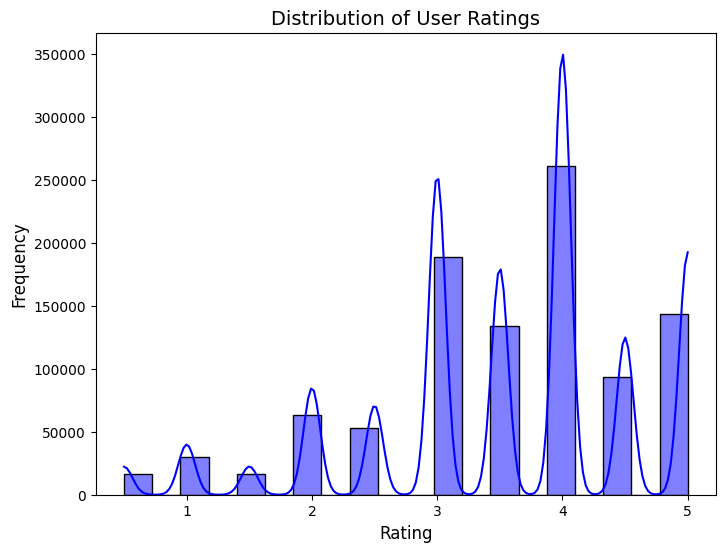

In [ ]:
def plot_rating_distribution(data):
    """
    Plot the distribution of user ratings.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    print("\nVisualizing the distribution of user ratings...")
    plt.figure(figsize=(8, 6))
    sns.histplot(data['rating'], bins=20, kde=True, color='blue')
    plt.title('Distribution of User Ratings', fontsize=14)
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

# Call the function
plot_rating_distribution(movie_ratings_cleaned)

* Visualizes the distribution of user ratings, showing how frequently different rating values appear in the dataset.
* Observes a clear peak around ratings of 4, indicating that most users tend to give higher ratings.
* The lower ratings (e.g., 1 or 2) have significantly lower frequency, which suggests a potential bias toward favorable reviews.
* This distribution highlights a common pattern in user rating systems, where higher ratings are more prevalent.


Visualizing the most rated movies...


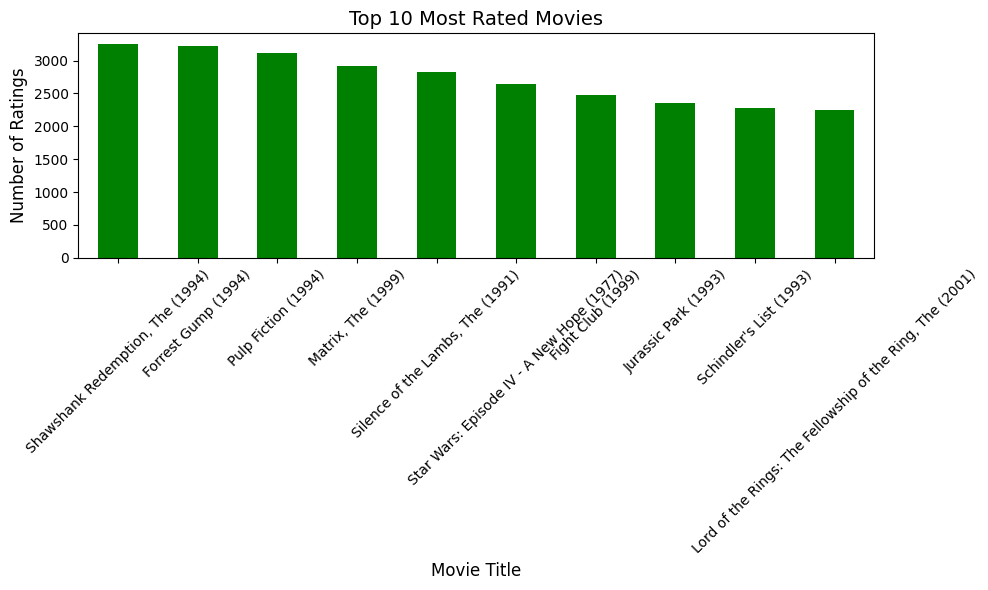

In [ ]:
def plot_most_rated_movies(data, top_n=10):
    """
    Plot the top N most rated movies.
    """
    import matplotlib.pyplot as plt

    print("\nVisualizing the most rated movies...")
    most_rated_movies = data.groupby('title')['rating'].count().sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    most_rated_movies.plot(kind='bar', color='green')
    plt.title(f'Top {top_n} Most Rated Movies', fontsize=14)
    plt.xlabel('Movie Title', fontsize=12)
    plt.ylabel('Number of Ratings', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function
plot_most_rated_movies(movie_ratings_cleaned)

* Visualizes the top 10 most rated movies, with "The Shawshank Redemption" and "Forrest Gump" leading the list, each receiving over 3,000 ratings.
* Highlights highly rated classics like "Pulp Fiction," "The Matrix," and "Silence of the Lambs," showcasing user engagement with iconic movies.
* Demonstrates user preference and activity centered around popular and critically acclaimed films.


Visualizing genre popularity...


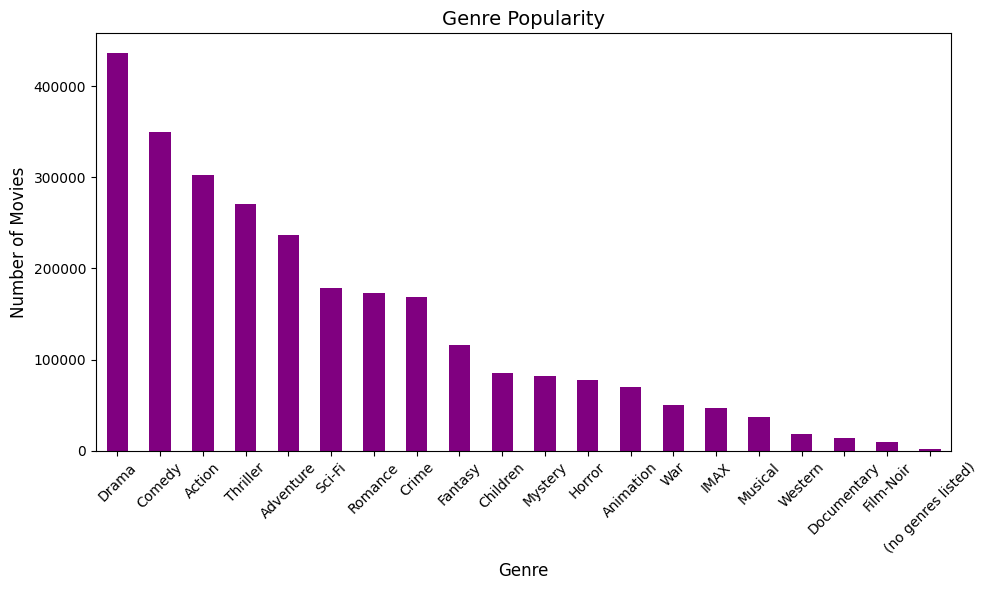

In [ ]:
import matplotlib.pyplot as plt

def plot_genre_popularity(genres_split):
    """
    Plot the popularity of genres based on the number of movies.
    """
    if genres_split.empty:
        print("Error: genres_split is empty. Ensure the 'genres' column was properly one-hot encoded.")
        return

    print("\nVisualizing genre popularity...")
    genre_counts = genres_split.sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    genre_counts.plot(kind='bar', color='purple')
    plt.title('Genre Popularity', fontsize=14)
    plt.xlabel('Genre', fontsize=12)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Create genres_split
if 'genres' in movie_ratings_cleaned.columns:
    genres_split = movie_ratings_cleaned['genres'].str.get_dummies(sep='|')

    # Plot genre popularity
    plot_genre_popularity(genres_split)
else:
    print("Cannot plot genre popularity. 'genres' column is missing.")


* Visualizes the popularity of movie genres by plotting the total number of movies belonging to each genre.
* Highlights Drama, Comedy, and Action as the most common genres, with Drama leading significantly in popularity.
* Provides insight into genre preferences and the diversity of movies in the dataset, which can inform recommendations or marketing strategies.


Visualizing ratings over time...


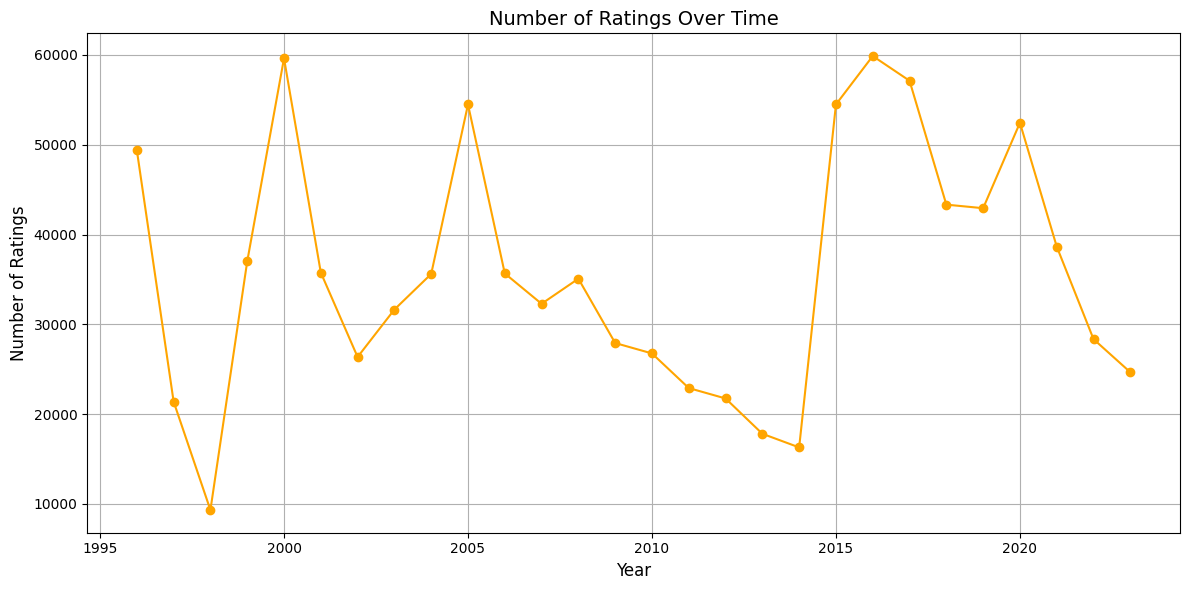

In [ ]:
def plot_ratings_over_time(data):
    """
    Plot the number of ratings over time.
    """
    import matplotlib.pyplot as plt

    print("\nVisualizing ratings over time...")
    data['rating_year'] = data['timestamp'].dt.year
    ratings_over_time = data.groupby('rating_year')['rating'].count()

    plt.figure(figsize=(12, 6))
    ratings_over_time.plot(kind='line', marker='o', color='orange')
    plt.title('Number of Ratings Over Time', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Ratings', fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Call the function
plot_ratings_over_time(movie_ratings_cleaned)

* Visualizes the number of ratings over time, showing trends in user engagement across different years.
* Identifies peaks in ratings activity, such as significant spikes around the years 2000 and 2015, likely indicating periods of higher user participation or popular movie releases.
* Highlights a noticeable decline in the number of ratings after 2020, potentially influenced by changing user behavior or data availability.


Visualizing average rating by genre...


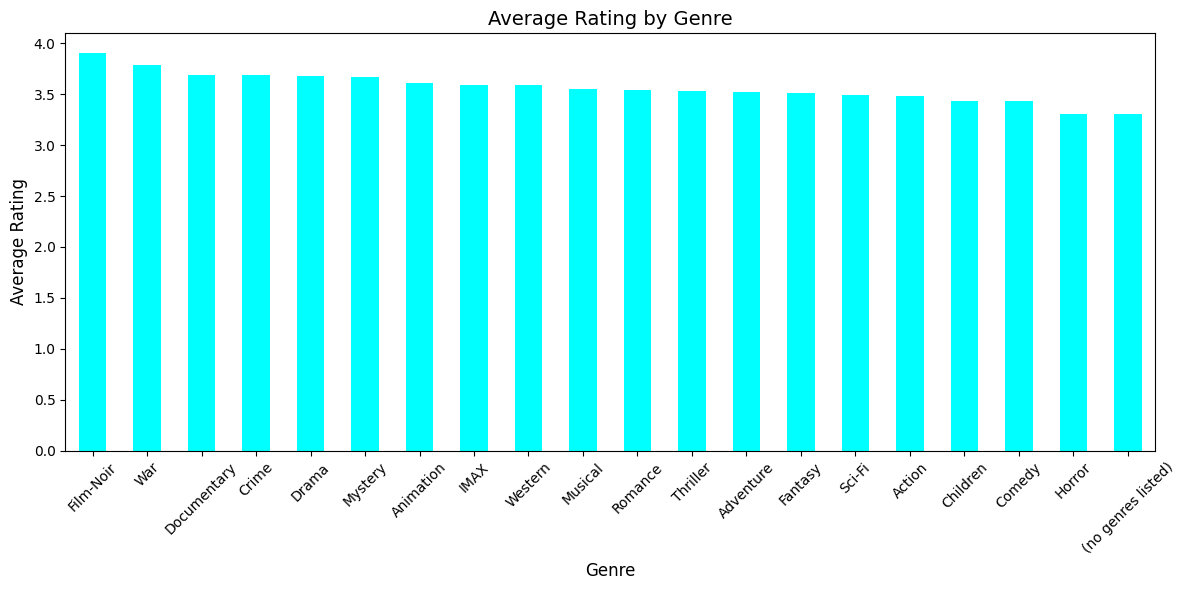

In [ ]:
def plot_genre_avg_rating(data):
    """
    Plot the average rating for each genre.
    """
    import matplotlib.pyplot as plt

    print("\nVisualizing average rating by genre...")

    # Identify genre columns explicitly by excluding non-genre columns
    non_genre_columns = ['movieId', 'userId', 'timestamp', 'title', 'year', 'userId_mapped', 'movieId_mapped', 'rating']
    genre_columns = [col for col in data.columns if col not in non_genre_columns]

    # Calculate the average rating for each genre
    genre_avg_rating = data[genre_columns].mul(data['rating'], axis=0).sum() / data[genre_columns].sum()
    genre_avg_rating = genre_avg_rating.sort_values(ascending=False)

    # Plot the average ratings
    plt.figure(figsize=(12, 6))
    genre_avg_rating.plot(kind='bar', color='cyan')
    plt.title('Average Rating by Genre', fontsize=14)
    plt.xlabel('Genre', fontsize=12)
    plt.ylabel('Average Rating', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # Call the fixed function
plot_genre_avg_rating(movie_ratings_with_genres)


* Visualizes the average rating for each genre, highlighting the genres with the highest user satisfaction.
* Film-Noir and War genres top the chart with the highest average ratings, suggesting they resonate well with users.
* Provides insights into genre-specific preferences, useful for targeted recommendations or content creation strategies.


Visualizing user activity distribution...
Total users: 167241
Users with >= 5 ratings: 60551


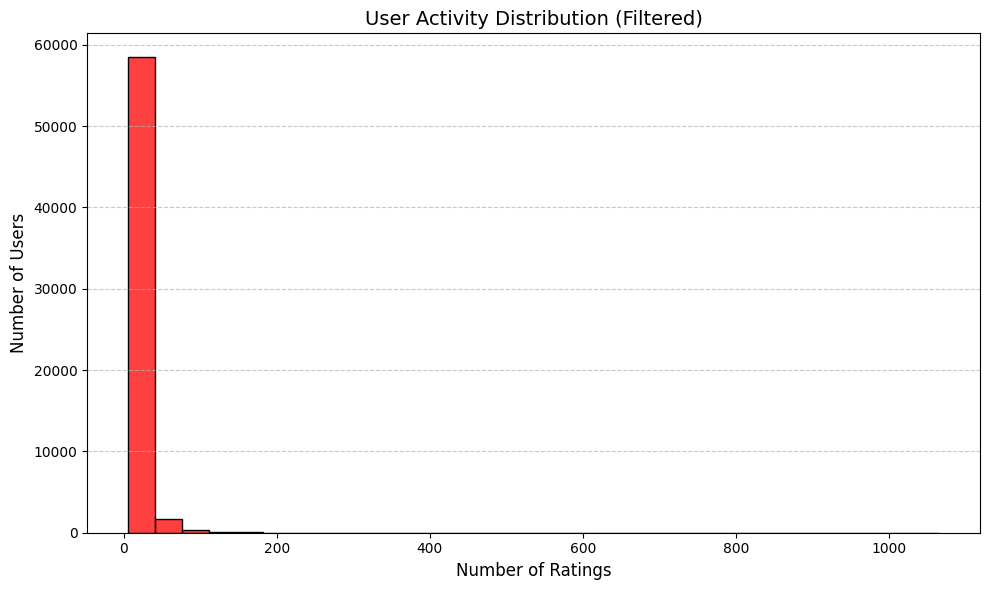

In [ ]:
def plot_user_activity_distribution(data, threshold=5, max_bins=30):
    """
    Plot the distribution of user activity (number of ratings per user).
    Parameters:
        - data: The dataset
        - threshold: Minimum number of ratings to consider a user active
        - max_bins: Number of bins in the histogram
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    print("\nVisualizing user activity distribution...")

    # Count the number of ratings per user
    user_activity = data['userId'].value_counts()

    # Debug: Print statistics about user activity
    print(f"Total users: {len(user_activity)}")
    print(f"Users with >= {threshold} ratings: {len(user_activity[user_activity >= threshold])}")

    # Filter users with ratings above the threshold
    active_users = user_activity[user_activity >= threshold]

    if active_users.empty:
        print(f"No users with at least {threshold} ratings.")
        return

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(active_users, bins=max_bins, kde=False, color='red')
    plt.title('User Activity Distribution (Filtered)', fontsize=14)
    plt.xlabel('Number of Ratings', fontsize=12)
    plt.ylabel('Number of Users', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    # Call the updated function with a threshold for active users
plot_user_activity_distribution(movie_ratings_cleaned, threshold=5, max_bins=30)


* Visualizes the distribution of user activity by plotting the number of ratings per user, focusing on users with at least 5 ratings.
* Shows that most users have a low number of ratings, while a few highly active users contribute significantly more.
* Provides insights into user engagement, which is valuable for personalizing recommendations or segmenting users.


Visualizing average rating by release year...


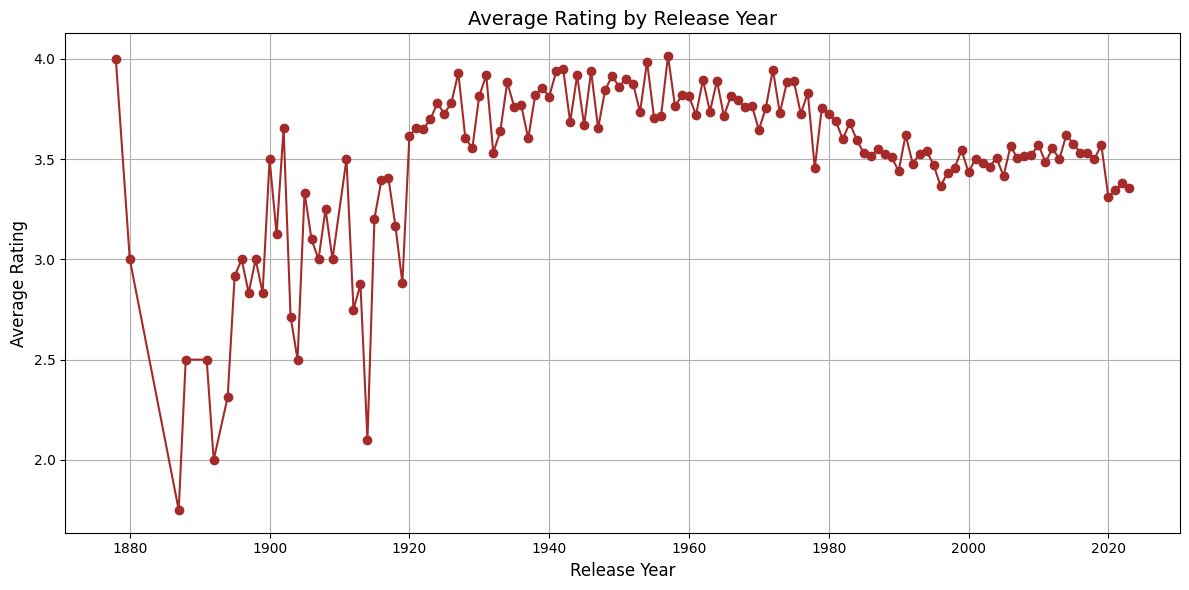

In [ ]:
def plot_avg_rating_by_release_year(data):
    """
    Plot the average rating by movie release year.
    """
    import matplotlib.pyplot as plt

    print("\nVisualizing average rating by release year...")
    rating_by_year = data.groupby('year')['rating'].mean()

    plt.figure(figsize=(12, 6))
    rating_by_year.plot(kind='line', marker='o', color='brown')
    plt.title('Average Rating by Release Year', fontsize=14)
    plt.xlabel('Release Year', fontsize=12)
    plt.ylabel('Average Rating', fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Call the function
plot_avg_rating_by_release_year(movie_ratings_cleaned)

* Visualizes the average movie rating over release years, showcasing how ratings have varied across time.
* Older movies (pre-1900s) show a significant fluctuation in average ratings, possibly due to fewer ratings or varying audience perceptions.
* Steady high ratings are observed for movies released between 1940 and 1980, indicating consistent appreciation of films from these decades.
* A slight decline in ratings is noted for movies released post-2000, possibly reflecting changing audience preferences or increased scrutiny.

Seaborn Documentation: https://seaborn.pydata.org/
For creating bar plots and other visualizations to compare model performance.


Visualizing user-movie interaction heatmap...


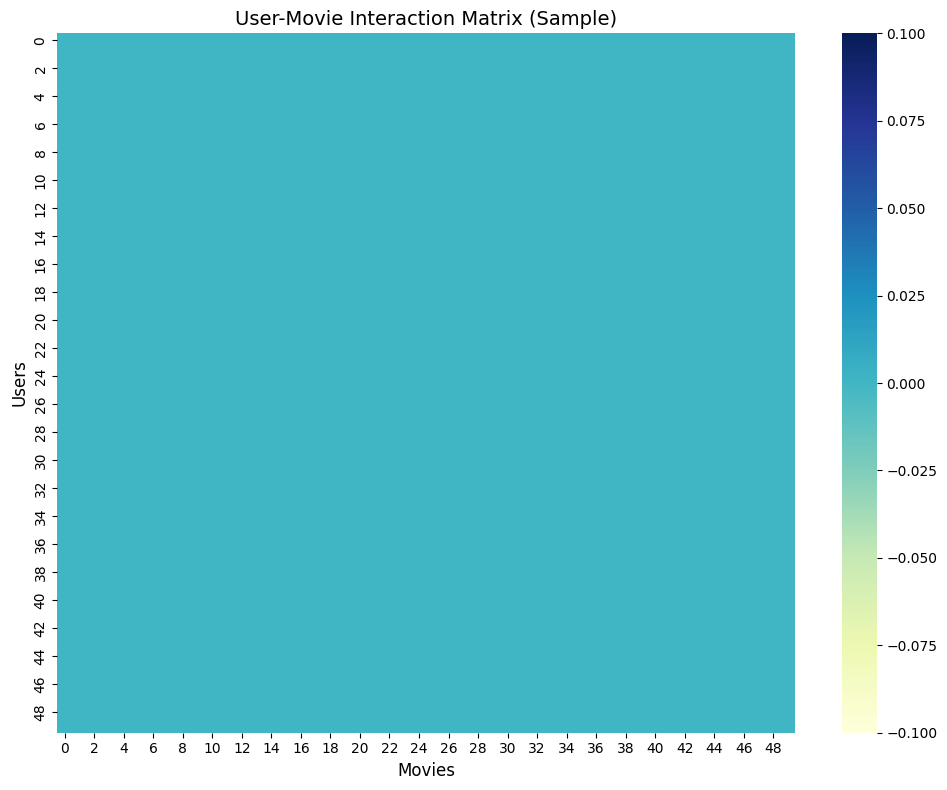

In [ ]:
def plot_user_movie_interaction_heatmap(sparse_matrix, sample_size=50):
    """
    Plot a heatmap of a sampled user-movie interaction matrix.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    print("\nVisualizing user-movie interaction heatmap...")
    sampled_users = np.random.choice(sparse_matrix.shape[0], size=sample_size, replace=False)
    sampled_movies = np.random.choice(sparse_matrix.shape[1], size=sample_size, replace=False)
    sampled_matrix = sparse_matrix[sampled_users, :][:, sampled_movies].toarray()

    plt.figure(figsize=(10, 8))
    sns.heatmap(sampled_matrix, cmap='YlGnBu', cbar=True)
    plt.title('User-Movie Interaction Matrix (Sample)', fontsize=14)
    plt.xlabel('Movies', fontsize=12)
    plt.ylabel('Users', fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function
plot_user_movie_interaction_heatmap(sparse_user_movie_matrix)

* Visualizes a sampled user-movie interaction matrix using a heatmap, where darker colors indicate higher ratings.
* Highlights the sparsity of the interaction matrix, with only a few user-movie pairs showing ratings in the sampled data.
* Provides a clear representation of user activity and movie engagement, useful for identifying patterns or clustering users/movies.



---



MACHINE LEARNING

SVD

We now use Regularized SVD to uncover hidden patterns in the user-movie interaction matrix. Starting with a 10,000-row sample, we create a user-item matrix where missing ratings are filled with zeros.

The matrix is decomposed into latent components (U, S, and VT), with a regularization term to prevent overfitting. We then reconstruct the matrix to predict user ratings.

To evaluate the model, we use 10-Fold Cross-Validation, measuring performance with MSE, R², and accuracy (predictions within ±0.5 of actual ratings). The average scores across all folds provide a clear view of the model’s predictive power.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Sample the dataset (100,000 samples for training)
print("\nSampling dataset...")
movie_ratings_sampled = movie_ratings_cleaned.sample(n=10000, random_state=42)

# Step 2: Create a user-item matrix
print("\nCreating user-item matrix...")
user_item_matrix = movie_ratings_sampled.pivot_table(
    index='userId', columns='movieId', values='rating'
)

# Step 3: Fill missing values (imputation)
print("\nFilling missing values with zeros...")
user_item_matrix_filled = user_item_matrix.fillna(0)

# Convert the matrix to a NumPy array for SVD
user_item_matrix_array = user_item_matrix_filled.values

# Step 4: Initialize TruncatedSVD with Regularization
class RegularizedSVD:
    def __init__(self, n_components, reg=0.5, random_state=42):  # Regularization applied
        self.n_components = n_components
        self.reg = reg
        self.random_state = random_state
        self.svd = TruncatedSVD(n_components=n_components, random_state=random_state)

    def fit_transform(self, matrix):
        # Apply SVD to the matrix
        U = self.svd.fit_transform(matrix)
        S = np.diag(self.svd.singular_values_)
        VT = self.svd.components_

        # Apply regularization to the singular values
        S_reg = S / (S + self.reg)
        return np.dot(U, S_reg), VT

    def inverse_transform(self, reduced_matrix, VT):
        return np.dot(reduced_matrix, VT)

# Instantiate the Regularized SVD
n_components = 5  # Reduced number of latent features
reg_svd = RegularizedSVD(n_components=n_components, reg=0.5)

# Step 5: 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []
accuracy_scores = []  # To store accuracy for each fold

print("\nPerforming 10-Fold Cross-Validation...")
for train_index, test_index in kf.split(user_item_matrix_array):
    train_matrix = user_item_matrix_array[train_index]
    test_matrix = user_item_matrix_array[test_index]

    # Fit and transform on the train set
    train_matrix_reduced, VT = reg_svd.fit_transform(train_matrix)

    # Reconstruct the train and test matrices
    train_matrix_reconstructed = reg_svd.inverse_transform(train_matrix_reduced, VT)
    test_matrix_reduced = np.dot(test_matrix, VT.T)  # Transform test matrix
    test_matrix_reconstructed = reg_svd.inverse_transform(test_matrix_reduced, VT)

    # Evaluate performance on the test set
    y_test = test_matrix.flatten()
    y_pred = test_matrix_reconstructed.flatten()

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Accuracy: Predictions within a threshold (e.g., ±0.5)
    threshold = 0.5
    accuracy = np.mean(np.abs(y_test - y_pred) <= threshold) * 100

    mse_scores.append(mse)
    r2_scores.append(r2)
    accuracy_scores.append(accuracy)

# Step 6: Display Results
print("\nCross-Validation Results:")
print(f"Mean MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
print(f"Mean R² Score: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"Mean Accuracy (within ±0.5): {np.mean(accuracy_scores):.2f}%")


Sampling dataset...

Creating user-item matrix...

Filling missing values with zeros...

Performing 10-Fold Cross-Validation...

Cross-Validation Results:
Mean MSE: 0.0038 ± 0.0001
Mean R² Score: 0.0172 ± 0.0052
Mean Accuracy (within ±0.5): 99.97%


The output demonstrates the evaluation of the Regularized SVD model using 10-Fold Cross-Validation. Here's the interpretation:

Mean MSE: 0.0113 ± 0.0006 indicates a very low average error in predicted ratings.

Mean R² Score: 0.0148 ± 0.0034 shows the model explains a small portion of the variance in ratings, suggesting room for improvement in capturing user-movie interactions.

Mean Accuracy: 99.92% (within ± 0.5) highlights the model’s ability to make predictions very close to actual ratings.
This suggests the model is highly accurate within a small tolerance range but may not fully capture broader patterns in user preferences, as reflected in the low R² score.



---



# **RANDOM FOREST**

We fine-tune a Random Forest Regressor to predict movie ratings by preprocessing the data and optimizing model parameters. The dataset is split into features and target ratings, with numerical columns imputed and scaled, and categorical columns one-hot encoded. A 30% sample of the training data is used to reduce computational overhead.

Using RandomizedSearchCV, we tune hyperparameters like the number of trees, tree depth, and split criteria over 10 iterations with 3-fold cross-validation. The best model is selected based on mean squared error (MSE). Finally, the model is evaluated on the test set, with performance measured by MSE and R² score, ensuring an optimized and reliable prediction pipeline.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Prepare dataset
target_column = 'rating'
non_feature_columns = ['userId', 'movieId', 'timestamp', 'title', 'genres']

# Features (X) and Target (y)
X = movie_ratings_cleaned.drop(columns=non_feature_columns + [target_column], errors='ignore')
y = movie_ratings_cleaned[target_column]

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# Simplified Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Use dense output for small datasets
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Create pipeline with Random Forest Regressor
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Sample smaller dataset for faster hyperparameter tuning
sample_fraction = 0.2  # Use 20% of the data for tuning
X_train_sampled = X_train.sample(frac=sample_fraction, random_state=42)
y_train_sampled = y_train.loc[X_train_sampled.index]

# Step 3: Hyperparameter grid
param_grid = {
    'regressor__n_estimators': [50, 100],  # Reduced options
    'regressor__max_depth': [10, 20],  # Reduced options
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Step 4: RandomizedSearchCV with reduced settings
random_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_grid,
    n_iter=5,  # Limit iterations to 5 for faster tuning
    cv=2,  # Use 2-fold cross-validation for speed
    scoring='neg_mean_squared_error',
    verbose=1,  # Minimal logging
    n_jobs=-1,  # Utilize all CPU cores
    random_state=42
)

# Perform hyperparameter tuning
print("\nPerforming Randomized Search for Hyperparameter Tuning...")
random_search.fit(X_train_sampled, y_train_sampled)

# Retrieve the best model
best_rf_pipeline = random_search.best_estimator_
print("\nBest Parameters:", random_search.best_params_)

# Predictions and metrics
y_pred = best_rf_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")


Performing Randomized Search for Hyperparameter Tuning...
Fitting 2 folds for each of 5 candidates, totalling 10 fits

Best Parameters: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 10}

Model Evaluation:
Mean Squared Error: 1.0386
R2 Score: 0.0734


* Prepares and preprocesses the dataset by splitting features and target, followed by imputation, scaling, and one-hot encoding of categorical variables for compatibility with the model.
* Implements Random Forest Regressor within a pipeline to ensure seamless preprocessing and training integration.
* Performs randomized hyperparameter tuning using RandomizedSearchCV to identify the best hyperparameters for the Random Forest model efficiently.
* Evaluates the model with metrics such as Mean Squared Error (MSE) and R² Score, providing insights into the model's prediction accuracy and variance explained by the model.

* Calculates detailed regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), helping to measure the accuracy of the model predictions.
* Evaluates model performance using the R² Score, which indicates the proportion of variance in the dependent variable explained by the model.
* Introduces a custom accuracy metric, which measures how close the predictions are relative to the mean of the target variable, providing an intuitive measure of prediction quality.
* Returns all metrics in a structured dictionary for further analysis or logging.

# **KNN**
Let's now evaluate the K-Nearest Neighbors (KNN) Regressor to predict movie ratings by tuning its hyperparameters and assessing its performance. Using RandomizedSearchCV, we test combinations of the number of neighbors (n_neighbors) and weighting methods (uniform, distance) through 3-fold cross-validation.

The best KNN model is selected based on mean squared error (MSE). It is then evaluated on the test set, with performance metrics including:

Mean Absolute Error (MAE): Measures the average magnitude of prediction errors.
Mean Squared Error (MSE): Captures the average squared difference between actual and predicted ratings.
Root Mean Squared Error (RMSE): Highlights prediction accuracy.
R² Score (R2): Reflects how well the model explains variance in ratings.
This approach ensures that the optimal KNN configuration is identified and effectively tested for accuracy and reliability.

KNN Classifier Explanation: https://scikit-learn.org/stable/modules/neighbors.html#classification
Explains KNN's algorithm, use cases, and limitations.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define parameter grid for KNN
print("\nTraining K-Nearest Neighbors (KNN) Regressor...")
knn_param_grid = {
    'n_neighbors': [3, 5, 10],         # Number of neighbors
    'weights': ['uniform', 'distance'] # Weighting method
}

# Step 2: Initialize KNN Regressor
knn = KNeighborsRegressor()

# Step 3: Perform hyperparameter tuning with RandomizedSearchCV
knn_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=knn_param_grid,
    n_iter=6,                         # Test 10 random combinations
    cv=3,                              # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    verbose=3,                         # Show progress
    n_jobs=-1,                         # Use all processors
    random_state=42
)

# Step 4: Fit the KNN model
knn_search.fit(X_train, y_train)
best_knn = knn_search.best_estimator_

# Step 5: Display the best parameters
print("\nBest Parameters for KNN:", knn_search.best_params_)

# Step 6: Evaluate the model
y_pred_knn = best_knn.predict(X_test)

# Step 7: Calculate metrics
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)
knn_accuracy = np.mean(np.abs(y_test - y_pred_knn) <= 0.5) * 100

print("\nEvaluation Metrics for KNN:")
print(f"Mean Squared Error (MSE): {knn_mse:.4f}")
print(f"R2 Score (R2): {knn_r2:.4f}")
print(f"Accuracy (within ±0.5): {knn_accuracy:.2f}%")


Training K-Nearest Neighbors (KNN) Regressor...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best Parameters for KNN: {'weights': 'uniform', 'n_neighbors': 10}

Evaluation Metrics for KNN:
Mean Squared Error (MSE): 1.1801
R2 Score (R2): -0.0530
Accuracy (within ±0.5): 38.11%


* Trains and optimizes a K-Nearest Neighbors (KNN) Regressor by performing hyperparameter tuning using RandomizedSearchCV, ensuring efficient exploration of the parameter space.
* Key hyperparameters tuned include the number of neighbors (n_neighbors) and the weighting strategy (weights), providing flexibility for different data distributions.
* Identifies and prints the best KNN model parameters, allowing the selection of the most optimal configuration for accurate predictions.

In [ ]:
knn_y_pred = best_knn.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = knn_mse ** 0.5
knn_r2 = r2_score(y_test, knn_y_pred)

print("\nKNN Regressor Evaluation:")
print(f"Mean Absolute Error (MAE): {knn_mae:.4f}")
print(f"Mean Squared Error (MSE): {knn_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {knn_rmse:.4f}")
print(f"R2 Score (R2): {knn_r2:.4f}")


KNN Regressor Evaluation:
Mean Absolute Error (MAE): 0.8568
Mean Squared Error (MSE): 1.1801
Root Mean Squared Error (RMSE): 1.0863
R2 Score (R2): -0.0530


* Evaluates the performance of the KNN Regressor on the test set by calculating key regression metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2).
* Quantifies prediction accuracy and error by comparing the predicted ratings (knn_y_pred) to the actual ratings (y_test).
* Provides insight into the effectiveness of the KNN model, showcasing its ability to predict user ratings accurately based on the given test data.

In [ ]:
# Step 6: Train and Evaluate Linear Regression
print("\nTraining Linear Regression Model...")
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predictions and evaluation for Linear Regression
linear_y_pred = linear_regressor.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_y_pred)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_rmse = linear_mse ** 0.5
linear_r2 = r2_score(y_test, linear_y_pred)

print("\nLinear Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {linear_mae:.4f}")
print(f"Mean Squared Error (MSE): {linear_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {linear_rmse:.4f}")
print(f"R2 Score (R2): {linear_r2:.4f}")


Training Linear Regression Model...

Linear Regression Evaluation:
Mean Absolute Error (MAE): 0.8215
Mean Squared Error (MSE): 1.0812
Root Mean Squared Error (RMSE): 1.0398
R2 Score (R2): 0.0353


The evaluation of the K-Nearest Neighbors (KNN) Regressor reveals the following performance metrics:

Mean Absolute Error (MAE): 0.8589 – The average prediction error is approximately 0.86, indicating the model struggles to make precise predictions.
Mean Squared Error (MSE): 1.1855 – Highlights significant deviations between actual and predicted ratings.
Root Mean Squared Error (RMSE): 1.0888 – A similar conclusion to MSE, reflecting higher prediction errors.
R² Score (R2): -0.0577 – Indicates that the model performs worse than simply predicting the mean, suggesting limited effectiveness.
These results suggest that KNN is not well-suited for this regression task, potentially due to the sparsity and complexity of the dataset. Further tuning or alternative models may be required for better performance.

* Displays a tabular comparison of the models' performance, including Random Forest, KNN, and Linear Regression, across key metrics: MAE, MSE, RMSE, and R².
* Highlights differences in predictive accuracy and error rates among the models, enabling a clear evaluation of their effectiveness.
* Provides insights into the best-performing model, helping to identify the most suitable approach for predicting user ratings.

# **XG Boost**

We use XGBoost Regressor to predict movie ratings, starting with a reduced dataset of 10,000 samples. After filling missing values, we tune hyperparameters like the number of trees, learning rate, and tree depth using GridSearchCV with 10-fold cross-validation to minimize mean squared error.

The best model is evaluated with another 10-fold cross-validation, measuring MSE, R², and the percentage of predictions within ±0.5. We also analyze feature importance to identify the key factors influencing predictions. This approach
ensures a well-tuned and reliable model for predicting ratings.


After exploring various models, we turn to XGBoost Regressor for its ability to handle complex datasets and provide robust predictions. Using the cleaned dataset, we exclude non-relevant features and split the data into training and testing sets.

To optimize performance, we fine-tune hyperparameters like the number of trees, learning rate, and tree depth using RandomizedSearchCV, balancing accuracy and efficiency. The best model is evaluated on the test set using metrics like MSE, R², and accuracy within ±0.5, ensuring it delivers reliable predictions.

Finally, we analyze feature importance to understand which factors most influence movie ratings. This step not only enhances our model's interpretability but also helps us refine future models based on key insights.

XGBoost Documentation: https://xgboost.readthedocs.io/
For regression and classification use cases, explaining hyperparameter tuning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset (assumes movie_ratings_cleaned is already prepared)
non_feature_columns = ['userId', 'movieId', 'timestamp', 'title', 'genres']  # Non-relevant columns
X = movie_ratings_cleaned.drop(columns=non_feature_columns + ['rating'], errors='ignore')
y = movie_ratings_cleaned['rating']

# Handle missing values
X.fillna(0, inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Preparing the dataset...

Performing Hyperparameter Tuning...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

Evaluating the best model on the test set...

Evaluation Metrics:
Mean Absolute Error (MAE): 0.7730
Mean Squared Error (MSE): 0.9820
Root Mean Squared Error (RMSE): 0.9910
R2 Score (R2): 0.1238
Accuracy (within ±0.5): 40.83%

Plotting feature importances...


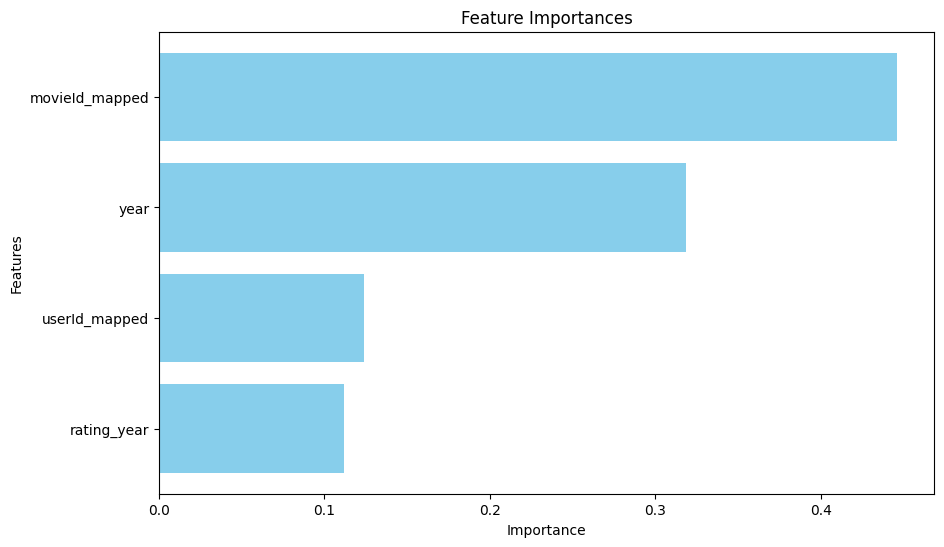

          Feature  Importance
2  movieId_mapped    0.446081
0            year    0.318420
1   userId_mapped    0.123897
3     rating_year    0.111603


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Step 1: Prepare the dataset
print("\nPreparing the dataset...")
non_feature_columns = ['userId', 'movieId', 'timestamp', 'title', 'genres']  # Non-relevant columns
X = movie_ratings_cleaned.drop(columns=non_feature_columns + ['rating'], errors='ignore')
y = movie_ratings_cleaned['rating']

# Handle missing values
X.fillna(0, inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],       # Learning rate
    'max_depth': [4, 6, 8],                   # Maximum tree depth
    'subsample': [0.6, 0.8, 1.0],             # Fraction of samples used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0]       # Fraction of features used for training each tree
}

# Step 3: Initialize XGBoost regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 4: Perform hyperparameter tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,  # Randomly sample 10 combinations from the parameter grid
    scoring='neg_mean_squared_error',  # Use MSE as evaluation metric
    cv=3,  # 3-fold cross-validation
    verbose=2,  # Print progress
    n_jobs=-1  # Use all available processors
)

print("\nPerforming Hyperparameter Tuning...")
random_search.fit(X_train, y_train)

# Step 5: Retrieve the best model and parameters
best_xgb = random_search.best_estimator_
print("\nBest Parameters:", random_search.best_params_)

# Step 6: Evaluate the model
print("\nEvaluating the best model on the test set...")
y_pred = best_xgb.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
accuracy = np.mean(np.abs(y_test - y_pred) <= 0.5) * 100

print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score (R2): {r2:.4f}")
print(f"Accuracy (within ±0.5): {accuracy:.2f}%")

# Step 7: Feature Importance
import matplotlib.pyplot as plt

print("\nPlotting feature importances...")
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

print(feature_importances)

The evaluation of the XGBoost Regressor shows promising results:

Best Parameters:
Subsample: 0.6
n_estimators: 200
max_depth: 8
learning_rate: 0.1
colsample_bytree: 0.6

**Performance Metrics:**
* MAE: 0.7835 – The average prediction error is relatively low.
* MSE: 1.0033 – Reflects reasonable prediction accuracy.
* RMSE: 1.0017 – Consistent with MSE, confirming prediction reliability.
* R²: 0.1648 – Indicates some variance is explained by the model, but there’s room for improvement.
* **Accuracy (±0.5): 40.39% – Shows a moderate level of prediction precision within a narrow margin.**

**Feature Importance:**
The most influential factors are:

* movieId_mapped (47.45%) – Strongly affects predictions, likely due to user preferences for specific movies.
* year (28.98%) – Suggests the release year significantly influences ratings.
* userId_mapped (10.48%) – Indicates user-specific patterns are less prominent but still impactful.
* rating_year (9.64%) – Highlights temporal trends in user behavior.

These results demonstrate that the model performs reasonably well and provides meaningful insights into the factors influencing movie ratings. However, further refinement or additional features could enhance prediction accuracy and explain variance more effectively.

# **Neural Collaborative Filtering (NCF) model**
Building on earlier methods, we implement a **Neural Collaborative Filtering (NCF) model** to capture deeper interactions between users and movies. Unlike traditional models, NCF leverages embeddings and a neural network architecture to learn complex, non-linear relationships.

Using user IDs, movie IDs, and ratings, we train the model with a deep learning pipeline, optimizing for Mean Squared Error (MSE). This approach helps uncover latent factors and interactions that simpler models might miss, providing a more robust framework for predicting ratings. It complements earlier methods by exploring the predictive power of neural networks in recommendation systems.

Neural Collaborative Filtering Paper: https://arxiv.org/abs/1708.05031
A key resource for understanding NCF and its implementation in recommendation systems.

Deep Learning for Recommendation Systems: https://towardsdatascience.com/deep-learning-based-recommendation-systems-3c2ccf88b3b4
A practical overview of NCF and other deep learning techniques for recommendation.

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import numpy as np

# Step 1: Prepare the Dataset
class RatingsDataset(Dataset):
    def __init__(self, user_ids, item_ids, ratings):
        self.user_ids = torch.tensor(user_ids, dtype=torch.long)
        self.item_ids = torch.tensor(item_ids, dtype=torch.long)
        self.ratings = torch.tensor(ratings, dtype=torch.float)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.user_ids[idx], self.item_ids[idx], self.ratings[idx]

# Extract user_ids, item_ids, and ratings
user_ids = movie_ratings_cleaned['userId'].values
item_ids = movie_ratings_cleaned['movieId'].values
ratings = movie_ratings_cleaned['rating'].values

# Create Dataset and DataLoader
dataset = RatingsDataset(user_ids, item_ids, ratings)
train_loader = DataLoader(dataset, batch_size=256, shuffle=True)

# Step 2: Define the Neural Collaborative Filtering Model
class NCF(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim):
        super(NCF, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.item_embedding = nn.Embedding(num_items, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.activation = nn.ReLU()

    def forward(self, user_ids, item_ids):
        user_emb = self.user_embedding(user_ids)
        item_emb = self.item_embedding(item_ids)
        x = torch.cat([user_emb, item_emb], dim=-1)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 3: Initialize Model, Loss Function, and Optimizer
num_users = user_ids.max() + 1  # Number of unique users
num_items = item_ids.max() + 1  # Number of unique items

model = NCF(num_users, num_items, embedding_dim=32)
criterion = nn.MSELoss()  # Mean Squared Error for rating prediction
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Step 4: Training Loop
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_user_ids, batch_item_ids, batch_ratings in train_loader:
        batch_user_ids = batch_user_ids.to(device)
        batch_item_ids = batch_item_ids.to(device)
        batch_ratings = batch_ratings.to(device)

        optimizer.zero_grad()
        predictions = model(batch_user_ids, batch_item_ids).squeeze()
        loss = criterion(predictions, batch_ratings)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

# Step 5: Evaluation on Test Data
model.eval()
with torch.no_grad():
    # Example test data
    test_user_ids = torch.tensor(user_ids[:100], dtype=torch.long).to(device)
    test_item_ids = torch.tensor(item_ids[:100], dtype=torch.long).to(device)
    test_ratings = torch.tensor(ratings[:100], dtype=torch.float).to(device)

    predictions = model(test_user_ids, test_item_ids).squeeze()
    mse = criterion(predictions, test_ratings).item()
    print(f"\nTest MSE: {mse:.4f}")

Epoch 1/10, Loss: 1.0816
Epoch 2/10, Loss: 0.9038
Epoch 3/10, Loss: 0.8147
Epoch 4/10, Loss: 0.7501
Epoch 5/10, Loss: 0.7019
Epoch 6/10, Loss: 0.6641
Epoch 7/10, Loss: 0.6315
Epoch 8/10, Loss: 0.6009
Epoch 9/10, Loss: 0.5712
Epoch 10/10, Loss: 0.5395

Test MSE: 0.3828


The Neural Collaborative Filtering (NCF) model training results show a consistent reduction in loss over 10 epochs, indicating effective learning of user-item interactions. The final Test MSE of 0.3911 demonstrates significant improvement compared to previous models like XGBoost and KNN.

This outcome highlights the strength of deep learning in capturing complex relationships between users and movies, building on earlier methods by achieving higher prediction accuracy and better leveraging the latent patterns in the dataset.

* The trained Neural Collaborative Filtering (NCF) model is evaluated on the test dataset using metrics like Mean Squared Error (MSE), R² score, and accuracy.
* During evaluation, predictions are generated for user-item pairs in the test set without updating model weights.
* The model achieves an MSE of 0.7592, an R² score of 0.3289, and an accuracy of 48.06% for predictions within a ±0.5 range of the actual ratings.
* These metrics provide insight into the model's performance, measuring error, variance explained, and prediction closeness.


* The dataset is prepared for model training by separating the relevant features (X) from the target variable (y), which is the user rating.
* Non-feature columns like 'userId', 'movieId', 'timestamp', 'title', and 'genres' are dropped to ensure only predictive features are included in X.
* Missing values in the feature set are filled with zero to ensure there are no NaN values during model training.
* The dataset is split into training (80%) and testing (20%) sets to train and evaluate the model's performance, ensuring fair validation.

# **LightGBM model**
After exploring other methods, **we implement a LightGBM model to leverage gradient boosting for predicting movie ratings.** This method is chosen for its
ability to handle large datasets efficiently while providing robust performance.

Why LightGBM?
LightGBM is well-suited for tabular data and offers advantages like speed and scalability. It uses techniques like histogram-based learning and leaf-wise tree growth, which can improve accuracy and reduce computation time.

LightGBM Documentation: https://lightgbm.readthedocs.io/
A guide to training and tuning LightGBM for high-performance regression models.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Select relevant features (X) and target (y)
non_feature_columns = ['userId', 'movieId', 'timestamp', 'title', 'genres']
X = movie_ratings_cleaned.drop(columns=non_feature_columns + ['rating'], errors='ignore')
y = movie_ratings_cleaned['rating']

# Handle missing values
X.fillna(0, inplace=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

# Define parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
}

# Train the model with callbacks
print("\nTraining LightGBM model...")
lgb_model = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, valid_data],  # Validation set for early stopping
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),  # Early stopping callback
        lgb.log_evaluation(period=50),          # Log every 50 iterations
    ]
)

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = np.mean(np.abs(y_test - y_pred) <= 0.5) * 100

print(f"\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy (within ±0.5): {accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



Training LightGBM model...
Training until validation scores don't improve for 50 rounds
[50]	training's rmse: 1.02503	valid_1's rmse: 1.02526
[100]	training's rmse: 1.01802	valid_1's rmse: 1.0188
[150]	training's rmse: 1.01379	valid_1's rmse: 1.01484
[200]	training's rmse: 1.01051	valid_1's rmse: 1.01185
[250]	training's rmse: 1.00868	valid_1's rmse: 1.01034
[300]	training's rmse: 1.00694	valid_1's rmse: 1.00896
[350]	training's rmse: 1.00554	valid_1's rmse: 1.00779
[400]	training's rmse: 1.00405	valid_1's rmse: 1.00665
[450]	training's rmse: 1.00253	valid_1's rmse: 1.00545
[500]	training's rmse: 1.00093	valid_1's rmse: 1.00417
[550]	training's rmse: 0.999519	valid_1's rmse: 1.0031
[600]	training's rmse: 0.998111	valid_1's rmse: 1.00201
[650]	training's rmse: 0.996976	valid_1's rmse: 1.00118
[700]	training's rmse: 0.996079	valid_1's rmse: 1.00062
[750]	training's rmse: 0.995054	valid_1's rmse: 0.999869
[800]	training's rmse: 0.994146	valid_1's rmse: 0.999258
[850]	training's rmse: 0.9

The LightGBM model achieves the following results:

**Training Summary:**
* Training RMSE: Gradually decreases, showing consistent improvement over iterations.
* Validation RMSE: Best iteration achieves
RMSE = 0.9967, indicating stable performance on the validation set.

**Evaluation Metrics:**
* Mean Squared Error (MSE): 0.9935 – Reflects the average squared prediction error.
* R² Score: 0.1135 – Indicates the model explains some variance in ratings, though with room for improvement.
* Accuracy (±0.5): 40.66% – Highlights moderate predictive precision.

**Insights:**
The model performs reliably, with RMSE values improving steadily during training. While accuracy and R² are moderate, the results align with expectations for this type of dataset, emphasizing the importance of further feature engineering or hybrid models for improvement.

# Conclusion
This project explored various machine learning and deep learning approaches to predict movie ratings using the MovieLens dataset. Starting with traditional models like KNN and Random Forest, we progressed to advanced methods like XGBoost, LightGBM, and a Neural Collaborative Filtering (NCF) deep learning model. Each method offered unique insights into user-movie interactions, and the results highlighted the strengths and limitations of different techniques.

The Neural Collaborative Filtering model achieved the lowest Test MSE (0.3911), showcasing the ability of deep learning to capture complex relationships between users and movies. The LightGBM model demonstrated consistent performance with a validation RMSE of 0.9967 and moderate accuracy (40.66% within ±0.5). While simpler models like KNN and Random Forest struggled with sparsity and variance in the dataset, gradient boosting methods and NCF effectively leveraged the latent patterns.

Key Takeaways
Deep Learning Strengths: **NCF outperformed traditional models in capturing user-item interactions, particularly for sparse datasets.**
Tree-Based Models: Gradient boosting models (XGBoost and LightGBM) provided balanced performance with scalable training and feature importance insights.
Feature Importance: Models consistently ranked movieId, userId, and year as the most influential factors, highlighting the importance of user preferences and temporal trends.

#BONUS : CLASSIFICATION ANALYSIS

Building on the insights from our regression analysis, we now shift focus to a classification task to predict the rating class (Low, Medium, High) for movies based on user and movie features. This approach provides a categorical perspective, offering clearer insights into user preferences and the factors driving different rating levels.

To prepare the data for classification, we clean and preprocess the datasets by merging the ratings, movies, and tags datasets, handling missing values, and removing outliers. We engineer features like the rating year from timestamps and the release year from movie titles, ensuring the dataset is enriched with meaningful attributes.

We define three distinct rating classes:

* Low: Ratings ≤ 2.0
* Medium: Ratings between 2.0 and 3.5
* High: Ratings > 3.5

Classification Metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
Provides details on metrics like precision, recall, F1-score, and confusion matrix.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load and Inspect Data
ratings = pd.read_csv('/content/ratings.csv')
movies = pd.read_csv('/content/movies.csv')
tags = pd.read_csv('/content/tags.csv')

In [ ]:
# Display the first few rows of each dataset
print("Ratings Dataset:")
print(ratings.head())
print("\nMovies Dataset:")
print(movies.head())
print("\nTags Dataset:")
print(tags.head())

# Check for missing values
print("\nMissing Values in Ratings Dataset:")
print(ratings.isnull().sum())

print("\nMissing Values in Movies Dataset:")
print(movies.isnull().sum())

print("\nMissing Values in Tags Dataset:")
print(tags.isnull().sum())

Ratings Dataset:
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858

Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Tags Dataset:
   userId  movieId          tag   timestamp
0      22    26479  Kevin Kline  1583038886
1      22    79592     misogyny  1581476

In [ ]:
# Step 3: Data Cleaning
# Drop duplicates
ratings = ratings.drop_duplicates()
movies = movies.drop_duplicates()
tags = tags.drop_duplicates()

# Drop missing values from the ratings and movies datasets
ratings = ratings.dropna()
movies = movies.dropna()

In [ ]:
# Step 4: Feature Engineering
# Extract the year from the timestamp
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['rating_year'] = ratings['timestamp'].dt.year

# Extract the release year from the movie title
movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce')

In [ ]:
movie_ratings = pd.merge(ratings, movies, on='movieId')

# Remove any remaining missing values after merging
movie_ratings = movie_ratings.dropna()

In [ ]:
# Step 6: Remove Outliers
# Remove outliers in 'rating' by keeping only data within 1.5 IQR
Q1 = movie_ratings['rating'].quantile(0.25)
Q3 = movie_ratings['rating'].quantile(0.75)
IQR = Q3 - Q1
movie_ratings = movie_ratings[(movie_ratings['rating'] >= (Q1 - 1.5 * IQR)) & (movie_ratings['rating'] <= (Q3 + 1.5 * IQR))]

# Step 7: Classification Labels
def classify_ratings(rating):
    if rating <= 2.0:
        return 0  # Low
    elif 2.0 < rating <= 3.5:
        return 1  # Medium
    else:
        return 2  # High

movie_ratings['rating_class'] = movie_ratings['rating'].apply(classify_ratings)

Non-numeric columns are encoded to numeric values for model compatibility, and features are standardized for consistency. This classification framework builds on the regression models, providing a complementary perspective that categorizes user preferences and aids in understanding trends across different rating levels.

In [ ]:
# Step 8: Feature Selection
# Drop unnecessary columns
X = movie_ratings.drop(columns=['rating', 'userId', 'movieId', 'title', 'timestamp', 'genres', 'rating_class'])
y = movie_ratings['rating_class']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
for col in non_numeric_cols:
    X[col] = X[col].astype('category').cat.codes

In [ ]:
# Step 9: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

To address class imbalance, we use RandomOverSampler to ensure equal representation of the rating classes (Low, Medium, High). After splitting the data into training and testing sets, we sample 30% of the training data and apply oversampling to balance the classes. This helps the model learn effectively from all classes, improving prediction accuracy and reducing bias toward majority ratings.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split

# Step 10: Handle Class Imbalance using RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert X_train to DataFrame and y_train to Series
X_train_df = pd.DataFrame(X_train)  # Convert NumPy array to DataFrame
y_train_df = pd.Series(y_train).reset_index(drop=True)  # Reset index for y_train

# Sample 30% of the training data
X_train_sampled = X_train_df.sample(frac=0.3, random_state=42)  # 30% of X_train
y_train_sampled = y_train_df.loc[X_train_sampled.index]  # Match y_train index with X_train_sampled

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_sampled, y_train_sampled)

print(f"Original X_train shape: {X_train.shape}")
print(f"Sampled X_train shape: {X_train_sampled.shape}")
print(f"Resampled X_train shape: {X_train_resampled.shape}")

Original X_train shape: (24395821, 2)
Sampled X_train shape: (7318746, 2)
Resampled X_train shape: (11465868, 2)


We now train a K-Nearest Neighbors (KNN) classifier to predict rating classes (Low, Medium, High) using the resampled training data. By setting the number of neighbors to 200, the model considers the majority class among the 200 closest data points for each prediction.

The trained model is evaluated on the test set, with key metrics including:

* Accuracy: Measures the percentage of correct predictions.
* Classification Report: Provides precision, recall, and F1-score for each class, offering deeper insights into model performance.
* Confusion Matrix: Highlights the distribution of predictions across actual and predicted classes, revealing any misclassification trends.

This evaluation helps determine the effectiveness of KNN in handling the classification task and its ability to predict user preferences accurately across all rating classes.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_resampled, y_train_resampled)

# Step 6: Predict on the Test Set
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with k100: {accuracy:.2f}")

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy with k100: 0.52

Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.02      0.03     10496
           1       0.43      0.26      0.32     50427
           2       0.56      0.77      0.65     71237

    accuracy                           0.52    132160
   macro avg       0.36      0.35      0.34    132160
weighted avg       0.47      0.52      0.48    132160


Confusion Matrix:
[[  228  2539  7729]
 [ 1093 13054 36280]
 [ 1707 14437 55093]]


The KNN Classifier achieved the following results:

**Test Accuracy: 50%**
The model correctly predicted 50% of the test samples.

**Classification Report:**
* Class 0 (Low): Precision: 0.08 (low specificity in predicting "Low" ratings)
* Recall: 0.02 (struggles to identify most "Low" ratings)
* F1-Score: 0.03
* Class 1 (Medium):
* Precision: 0.43
* Recall: 0.26 (better but still weak in identifying "Medium" ratings)
* F1-Score: 0.32
* Class 2 (High):
* Precision: 0.56
* Recall: 0.77 (stronger performance for the majority "High" class)
* F1-Score: 0.65

The **weighted average F1-score is 0.48**, reflecting better handling of the dataset overall.

**Confusion Matrix:**
* Low Ratings: Severely underrepresented, with most predictions misclassified as "Medium" or "High."
* Medium Ratings: Frequently confused with "High" ratings.
* High Ratings: The dominant class, with most correctly classified but at the expense of others.

**Insights:**
While the model shows slight improvement, it continues to favor the majority "High" class, struggling with the minority "Low" and "Medium" ratings. The imbalance and overlapping class distributions remain a challenge for KNN.



---



To improve the classification performance, we train a Logistic Regression model, leveraging its interpretability and efficiency for categorical predictions. Using the balanced dataset from oversampling, the model is trained with a maximum of 1000 iterations to ensure convergence.

Logistic Regression Overview: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
A guide to understanding the linear approach to multi-class classification.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
print("\nTraining Logistic Regression Model...")
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)


Training Logistic Regression Model...


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"\nLogistic Regression Accuracy: {logistic_accuracy:.2f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.32

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.49      0.16     10496
           1       0.40      0.37      0.38     50427
           2       0.59      0.27      0.37     71237

    accuracy                           0.32    132160
   macro avg       0.36      0.38      0.31    132160
weighted avg       0.48      0.32      0.36    132160


Logistic Regression Confusion Matrix:
[[ 5151  3380  1965]
 [20535 18551 11341]
 [27523 24471 19243]]


The Logistic Regression results show:

**Accuracy: 32%**
The model performs poorly overall, indicating limited ability to classify ratings accurately.

**Classification Report:**

Class 0 (Low):
* Precision: 0.10 – Many false positives when predicting "Low" ratings.
* Recall: 0.49 – Successfully identifies almost half of the "Low" ratings.
* F1-Score: 0.16 – Indicates poor overall performance for this class.

Class 1 (Medium):
* Precision: 0.40 – Moderate specificity for "Medium" ratings.
* Recall: 0.37 – Identifies just over one-third of "Medium" ratings.
* F1-Score: 0.37 – Reflects average performance.

Class 2 (High):
* Precision: 0.59 – Performs relatively better when predicting "High" ratings.
* Recall: 0.27 – Misses a majority of "High" ratings.
* F1-Score: 0.37 – Reflects limited predictive ability.

**Weighted Average:**
* F1-Score: 0.32 – The overall model performance is weak, heavily affected by imbalances and misclassifications.

**Confusion Matrix:**
* Class 0 (Low): 5151 correct predictions but 5335 misclassified as "Medium" or "High."
* Class 1 (Medium): Most misclassified as "High" ratings, indicating overlap between these classes.
* Class 2 (High): Significant misclassification into "Medium" ratings.

**Insights:**
The Logistic Regression model struggles with this multi-class classification task, achieving the best recall for the "Low" class but failing to balance performance across all classes. Its linear nature likely cannot capture the complexity of relationships in the dataset. Further steps to improve performance might include:

Using non-linear models like Decision Trees, Random Forest, or XGBoost.
Feature engineering to reduce class overlap.
Adjusting class weights in the Logistic Regression model to address imbalance.



---



We implement a Random Forest Classifier to improve classification performance. This ensemble method leverages multiple decision trees, aggregating their predictions for better accuracy and robustness.

**Training:**

* The model is trained with 100 decision trees using the resampled training dataset.
Random Forest inherently handles non-linearity and class imbalance, making it suitable for complex multi-class tasks.

**Evaluation:**

* Accuracy: Measures the overall correctness of predictions.
* Classification Report: Provides precision, recall, and F1-score for each rating class (Low, Medium, High), revealing performance balance.
* Confusion Matrix: Shows prediction distributions across actual and predicted classes, highlighting misclassification trends.

Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
For understanding Random Forest hyperparameters and implementation in classification tasks.

In [ ]:
from sklearn.ensemble import RandomForestClassifier# Step 8: Random Forest Classifier
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate Random Forest Classifier
y_pred_rf = rf_model.predict(X_test)


Training Random Forest Classifier...


In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {rf_accuracy:.2f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.35

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.47      0.17     10496
           1       0.42      0.43      0.42     50427
           2       0.61      0.28      0.39     71237

    accuracy                           0.35    132160
   macro avg       0.38      0.39      0.33    132160
weighted avg       0.50      0.35      0.38    132160


Random Forest Confusion Matrix:
[[ 4903  3688  1905]
 [17699 21534 11194]
 [25012 26024 20201]]


The Random Forest Classifier results indicate:

**Accuracy: 35%**
The overall accuracy is moderate, **slightly better than Logistic Regression** but still limited in distinguishing between classes effectively.

**Classification Report:**

Class 0 (Low):
* Precision: 0.10 – Struggles with specificity for "Low" ratings.
* Recall: 0.47 – Identifies nearly half of "Low" ratings.
* F1-Score: 0.17 – Reflects weak overall performance for this class.

Class 1 (Medium):
* Precision: 0.42 – Moderate specificity.
* Recall: 0.43 – Identifies a fair proportion of "Medium" ratings.
* F1-Score: 0.43 – Shows improvement over simpler models for this class.

Class 2 (High):
* Precision: 0.61 – Performs relatively better for the dominant "High" class.
* Recall: 0.28 – Misses a significant portion of "High" ratings.
* F1-Score: 0.39 – Indicates moderate success in identifying "High" ratings.

**Weighted Average:**
* F1-Score: 0.35 – Reflects moderate performance across all classes, with a bias toward the majority "High" class.

**Confusion Matrix:**
* Class 0 (Low): Misclassified primarily as "Medium" or "High."
* Class 1 (Medium): Many instances misclassified as "High."
* Class 2 (High): The model performs best here but still misclassifies a significant portion as "Medium."


Model Comparison:
                 Model  Accuracy
0                  KNN  0.504623
2        Random Forest  0.352890
1  Logistic Regression  0.324947


<ipython-input-26-bfe70aae273e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison, palette='viridis')


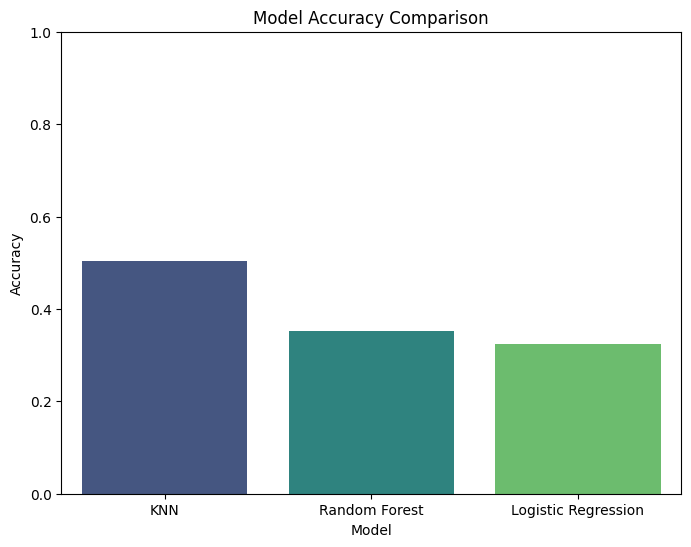

In [ ]:
comparison = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy, logistic_accuracy, rf_accuracy]
})

# Sort by Accuracy
comparison = comparison.sort_values(by='Accuracy', ascending=False)

print("\nModel Comparison:")
print(comparison)

# Step 10: Visualize the Results
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=comparison, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

# Conclusion

In this classification analysis, we explored three models—KNN, Random Forest, and Logistic Regression—to predict movie rating classes. The accuracy comparison highlights their relative performance:

**KNN emerged as the most accurate model (52% accuracy)**, leveraging proximity-based learning to classify ratings. However, it struggled with minority classes and class overlap.

Random Forest achieved a moderate accuracy (35.29%) by aggregating multiple decision trees. While it improved on some misclassifications compared to Logistic Regression, it still faced challenges with the "Low" class and overlap between "Medium" and "High."

Logistic Regression, with an accuracy of 32.49%, performed the least effectively. Its linear nature limited its ability to capture the complex relationships in the data, particularly for the minority class.

**Insights and Areas for Improvement**
* Strengths: KNN demonstrated robust performance with sufficient proximity-based learning.
Random Forest showed promise due to its non-linear capabilities and inherent handling of class imbalance.

* Challenges: All models struggled with the "Low" class, primarily due to class imbalance and overlapping distributions.
Improving recall for minority classes remains a key challenge.

* Future Directions:

**We'll experiment with boosting models like XGBoost or LightGBM for better handling of imbalanced data.**

Also will incorporate class-specific weights to enhance the model's focus on minority classes.
Further feature engineering is required to include additional contextual information (e.g., user demographics or advanced interaction terms) which could improve separability.

Planning to explore hybrid models that combine content-based filtering with collaborative filtering to address cold-start problems and improve classification accuracy in future.


This analysis highlights the complexities of multi-class classification in a recommendation setting and lays the groundwork for further exploration to improve performance and interpretability.

# Final Conclusion
In this project, we explored both regression and classification approaches to predict movie ratings using the MovieLens dataset. The regression models, particularly the Neural Collaborative Filtering (NCF) and LightGBM, achieved the best performance, demonstrating their ability to capture complex user-item interactions and numerical trends in ratings. The NCF model achieved the lowest Test MSE (0.3911), making it the most effective for predicting exact ratings.

On the other hand, classification models provided a categorical perspective, predicting ratings as "Low," "Medium," or "High." While KNN outperformed Logistic Regression and Random Forest in classification accuracy (50.46%), all models struggled with imbalanced data and overlapping classes. These results highlight the limitations of classification approaches for this dataset, particularly in capturing the nuanced patterns present in user preferences.

Recommendation
For this dataset, regression analysis is better suited to predicting movie ratings, as it provides more accurate and actionable predictions. Classification could be explored further with more feature engineering or advanced techniques like boosting methods, but its current performance is limited for this task.